# AML Project _ US Youtube Trending Videos

In [1]:
import pandas as pd
import numpy as np
import math as m
import random as rand
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn import linear_model as lm, metrics, ensemble as ens
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.svm import SVC
from sklearn.feature_selection import RFE, RFECV, SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
from sklearn.decomposition import TruncatedSVD

import warnings

/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Initial Dataset

In [2]:
#READ IN DATA
df_initial = pd.read_csv("USVideos_initial.csv")

In [3]:
##CHECK DIMENSION
df_initial.shape

(4547, 23)

In [4]:
#CHECK DATA
df_initial.head()

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber
0,2kyS6SvSYSE,2017-11-20,2017-11-13,17,22,CaseyNeistat,2564903,96321,7972,22149,...,False,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,7,7,2,2,1,9086142.0
1,1ZAPwfrtAFY,2017-11-20,2017-11-13,7,24,LastWeekTonight,6109402,151250,11508,19820,...,False,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",7,7,65,69,4,5937292.0
2,5qpjK5DgCt4,2017-11-20,2017-11-12,19,23,Rudy Mancuso,5315471,187303,7278,9990,...,True,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,7,8,68,426,23,4191209.0
3,puqaWrEC7tY,2017-11-20,2017-11-13,11,24,Good Mythical Morning,913268,16729,1386,2988,...,True,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,7,7,488,1246,28,13186408.0
4,d380meD0W0M,2017-11-19,2017-11-12,18,24,nigahiga,2819118,153395,2416,20573,...,True,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,6,7,488,1007,14,20563106.0


In [5]:
##CHECK VARIABLES
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4547 entries, 0 to 4546
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   video_id                     4547 non-null   object 
 1   last_trending_date           4547 non-null   object 
 2   publish_date                 4547 non-null   object 
 3   publish_hour                 4547 non-null   int64  
 4   category_id                  4547 non-null   int64  
 5   channel_title                4547 non-null   object 
 6   views                        4547 non-null   int64  
 7   likes                        4547 non-null   int64  
 8   dislikes                     4547 non-null   int64  
 9   comment_count                4547 non-null   int64  
 10  comments_disabled            4547 non-null   bool   
 11  ratings_disabled             4547 non-null   bool   
 12  tag_appeared_in_title_count  4547 non-null   int64  
 13  tag_appeared_in_ti

In [6]:
##CHECK DIMENSION
df_initial.describe()

,publish_hour,category_id,views,likes,dislikes,comment_count,tag_appeared_in_title_count,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber
count,4547.000000,4547.000000,4.547000e+03,4.547000e+03,4.547000e+03,4.547000e+03,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4.525000e+03
mean,13.503189,20.416538,1.265665e+06,3.919696e+04,2.616788e+03,4.938788e+03,2.961293,4.830658,34.429954,130.335386,437.941060,19.209369,3.164303e+06
std,6.548420,7.309226,4.526133e+06,1.419793e+05,3.662803e+04,3.110122e+04,2.482547,2.614707,247.514298,150.400756,616.584168,12.452361,4.831613e+06
min,0.000000,1.000000,5.590000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,8.000000,17.000000,9.089650e+04,1.486000e+03,7.600000e+01,2.260000e+02,1.000000,3.000000,5.000000,22.000000,68.000000,9.000000,2.466470e+05
50%,15.000000,24.000000,3.188400e+05,7.397000e+03,2.910000e+02,8.540000e+02,3.000000,5.000000,6.000000,85.000000,217.000000,18.000000,1.198769e+06
75%,18.000000,25.000000,1.006673e+06,2.557550e+04,1.023000e+03,2.862500e+03,4.000000,7.000000,7.000000,151.000000,515.000000,29.000000,3.766915e+06
max,23.000000,43.000000,1.493761e+08,3.093544e+06,1.674420e+06,1.361580e+06,18.000000,14.000000,4215.000000,488.000000,3644.000000,69.000000,2.867694e+07


## Initial Data Preprocessing

### Missing values

In [7]:
#CHECK NA/MISSING VALUES
df_initial.isna().sum()

video_id                         0
last_trending_date               0
publish_date                     0
publish_hour                     0
category_id                      0
channel_title                    0
views                            0
likes                            0
dislikes                         0
comment_count                    0
comments_disabled                0
ratings_disabled                 0
tag_appeared_in_title_count      0
tag_appeared_in_title            0
title                            0
tags                           208
description                     89
trend_day_count                  0
trend.publish.diff               0
trend_tag_highest                0
trend_tag_total                  0
tags_count                       0
subscriber                      22
dtype: int64

In [8]:
#CHECK NA/MISSING VALUES
per_miss = df_initial.isna().sum() * 100 / len(df_initial)
missing_df = pd.DataFrame({'Column_Name': df_initial.columns,
                            'Percent_Missing': per_miss})

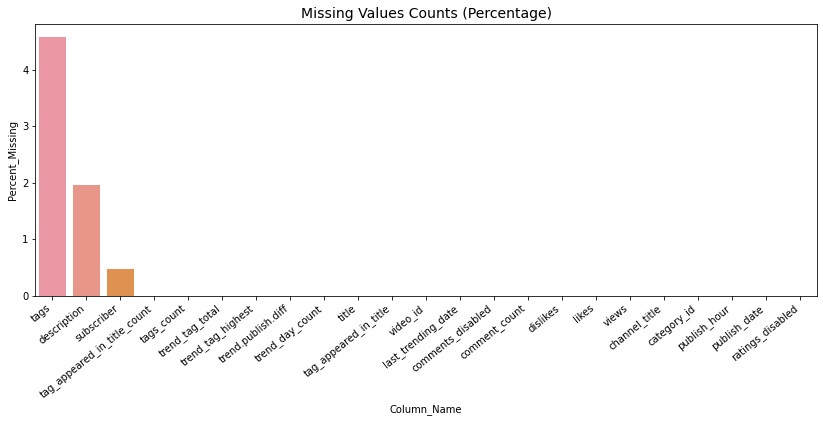

In [9]:
plt.figure(figsize=(14, 5))
mis_per = sns.barplot(data=missing_df, 
              x="Column_Name", y="Percent_Missing",
              order = missing_df.sort_values('Percent_Missing',ascending = False).Column_Name);
mis_per.set_title("Missing Values Counts (Percentage)", fontsize = 14);


mis_per.set_xticklabels(
    mis_per.get_xticklabels(),
    rotation=39,
    horizontalalignment='right'
);

#plt.xticks(rotation = 60);

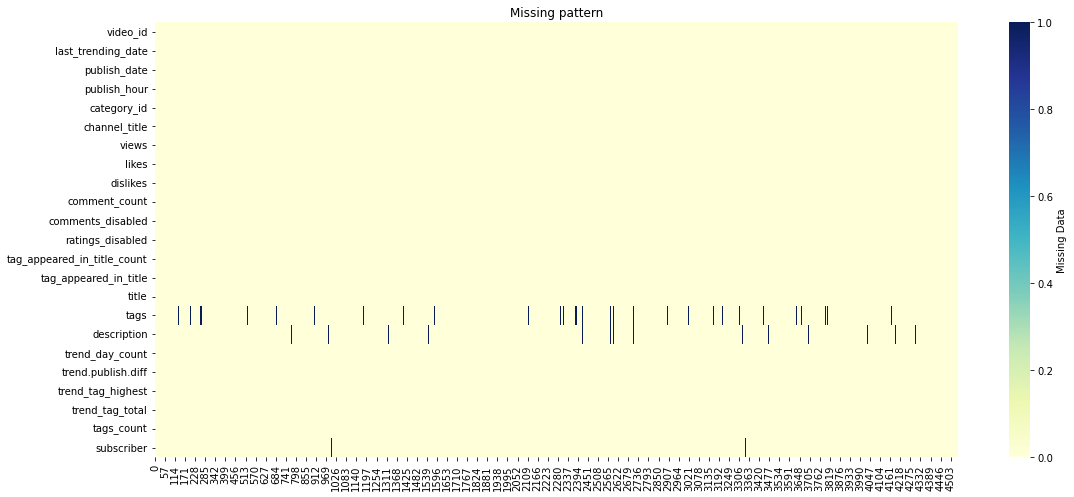

In [10]:
plt.figure(figsize=(18,8))
mis_vis = sns.heatmap(df_initial.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'}); 
mis_vis.set_title("Missing pattern");


### Likes/Dislikes Percentage

In [11]:
#LIKES/DISLIKES Proportion
df_update1 = df_initial.copy()
df_update1["likes_per"] = df_update1["likes"] / (df_update1["likes"] + df_update1["dislikes"])
df_update1["dislikes_per"] = df_update1["dislikes"] / (df_update1["likes"] + df_update1["dislikes"])

### Extract Month and Day From Date

In [12]:
df_update1['last_trending_date'] = pd.to_datetime(df_update1['last_trending_date'])
df_update1['publish_date'] = pd.to_datetime(df_update1['publish_date'])

In [13]:
df_update1["last_trending_date_Month"] = pd.DatetimeIndex(df_update1['last_trending_date']).month
df_update1["last_trending_date_Day"] = pd.DatetimeIndex(df_update1['last_trending_date']).day
df_update1["publish_date_Month"] = pd.DatetimeIndex(df_update1['publish_date']).month
df_update1["publish_date_Day"] = pd.DatetimeIndex(df_update1['publish_date']).day

### Subscriber: From float to int

In [14]:
df_update1['subscriber'] = df_update1['subscriber'].fillna(-1)
df_update1 = df_update1.astype({'subscriber':'Int64'})
df_update1['subscriber'] = df_update1['subscriber'].replace(-1, np.nan)

In [15]:
df_update1['subscriber'].isna().sum()

22

In [16]:
df_update1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4547 entries, 0 to 4546
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   video_id                     4547 non-null   object        
 1   last_trending_date           4547 non-null   datetime64[ns]
 2   publish_date                 4547 non-null   datetime64[ns]
 3   publish_hour                 4547 non-null   int64         
 4   category_id                  4547 non-null   int64         
 5   channel_title                4547 non-null   object        
 6   views                        4547 non-null   int64         
 7   likes                        4547 non-null   int64         
 8   dislikes                     4547 non-null   int64         
 9   comment_count                4547 non-null   int64         
 10  comments_disabled            4547 non-null   bool          
 11  ratings_disabled             4547 non-null 

## EDAV

### Time line for Views

Text(0.5, 1.0, 'Average Views from 2006 - 2019')

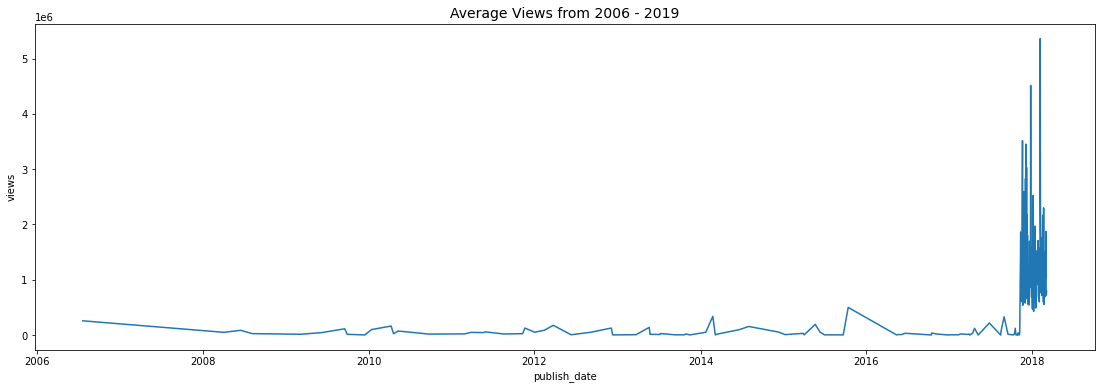

In [17]:
df_initial['publish_date'] = pd.to_datetime(df_initial['publish_date']).dt.date
df_time = df_initial.groupby(by = "publish_date").mean()

plt.figure(figsize=(19,6))
a = sns.lineplot(x = "publish_date", y = "views", data = df_time)
a.set_title("Average Views from 2006 - 2019", fontsize = 14)
#a.set(xlim=(2006, None))

Text(0.5, 1.0, 'Zoom in: Average Views from 2017/10 - 2018/03')

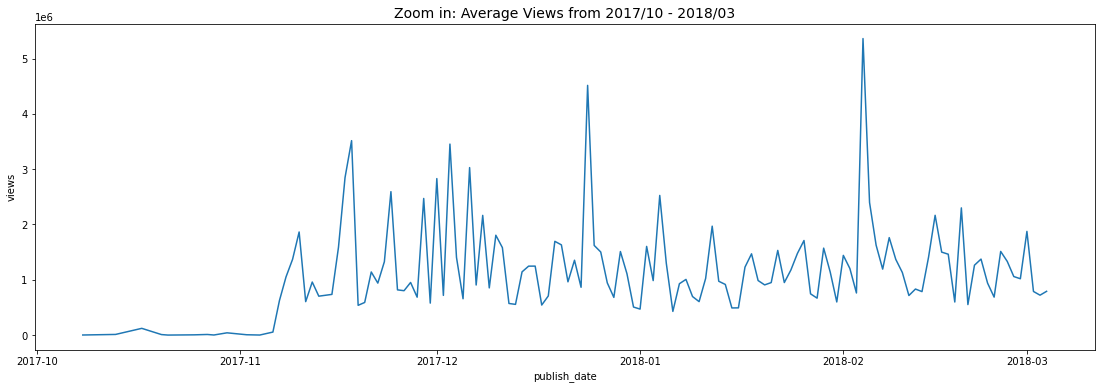

In [18]:
import datetime

df_test = df_initial[(df_initial['publish_date'] >= datetime.date(year=2017,month=10,day=1))]  

df_time = df_test.groupby(by = "publish_date").mean()

plt.figure(figsize=(19,6))
a = sns.lineplot(x = "publish_date", y = "views",
             data = df_time)
a.set_title("Zoom in: Average Views from 2017/10 - 2018/03", fontsize = 14)
#a.set(xlim=(2006, None))



### Correlation Analysis

In [19]:
#Log transformation
df_update1["log_views"] = np.log(df_update1["views"])
#df_update1["log_comment_count"] = np.log(df_update1["comment_count"])
#df_update1["log_subscriber"] = np.log(df_update1["subscriber"])
#df_update1["log_subscriber"] = np.log(df_update1["subscriber"])
#df_update1["log_tags_count"] = np.log(df_update1["tags_count"])

In [20]:
features = ["log_views","views",#"log_comment_count", "log_subscriber", "log_tags_count",# 
            "publish_hour", "category_id", "comment_count", "comments_disabled", "ratings_disabled", 
           "tag_appeared_in_title_count", "tag_appeared_in_title", "trend_day_count", "trend.publish.diff", 
           "trend_tag_highest", "trend_tag_total", "tags_count", "subscriber", "likes_per", "dislikes_per", "publish_date_Month",
            "publish_date_Day"]

numerics = ["views", "tag_appeared_in_title_count", 
            "trend_tag_highest", "trend_tag_total", "tags_count", "subscriber"]

In [21]:
df_selected = df_update1[features]
df_selected = df_selected.dropna(subset = ['subscriber'])

In [22]:
df_numerics = df_update1[numerics]
df_numerics = df_numerics.dropna(subset = ['subscriber'])

In [23]:
df_cor = df_update1[features]

In [24]:
df_cor = df_cor.astype({"comments_disabled":'int', "ratings_disabled": 'int', "tag_appeared_in_title":'int'})

<Figure size 576x576 with 0 Axes>

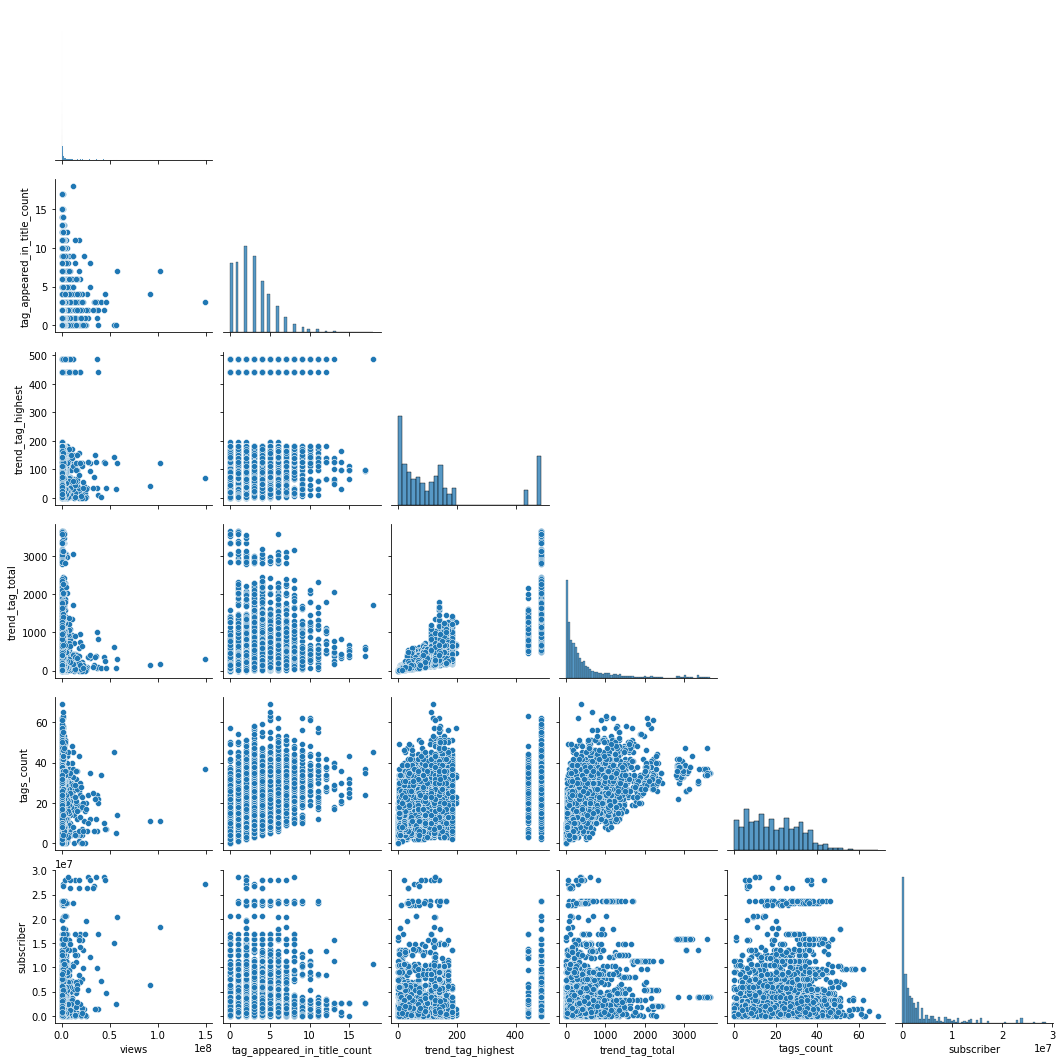

In [25]:
#Correlogram (without regression)
plt.figure(figsize=(8, 8))
CM = sns.pairplot(df_numerics, kind="scatter", corner=True);
plt.show();

In [26]:
#Correlation Matrix
corr_matrix = df_cor.corr()
corr_matrix

,log_views,views,publish_hour,category_id,comment_count,comments_disabled,ratings_disabled,tag_appeared_in_title_count,tag_appeared_in_title,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber,likes_per,dislikes_per,publish_date_Month,publish_date_Day
log_views,1.000000,0.442176,-0.032076,-0.122309,0.248237,-0.050599,-0.029762,0.104684,0.088789,0.369065,-0.139135,0.094755,0.099485,0.151151,0.388713,0.142059,-0.142059,-0.061555,-0.003365
views,0.442176,1.000000,-0.026818,-0.117380,0.573385,0.011888,0.032353,0.024586,0.009282,0.190477,-0.029170,-0.013075,-0.021857,0.009490,0.265718,0.011202,-0.011202,0.004505,-0.030264
publish_hour,-0.032076,-0.026818,1.000000,0.068808,0.010913,-0.016046,0.031533,0.021860,0.047040,0.034103,-0.012244,-0.036036,-0.120239,0.042927,-0.034482,0.047745,-0.047745,0.022873,0.004903
category_id,-0.122309,-0.117380,0.068808,1.000000,-0.026771,0.039750,-0.019702,-0.052694,-0.037917,-0.099876,-0.048388,0.131418,0.146148,0.142810,-0.004665,-0.090919,0.090919,-0.012004,-0.005292
comment_count,0.248237,0.573385,0.010913,-0.026771,1.000000,-0.020706,-0.010960,-0.011338,-0.010686,0.084763,-0.017414,0.008993,-0.012426,0.008716,0.191212,-0.029928,0.029928,-0.003815,-0.016928
comments_disabled,-0.050599,0.011888,-0.016046,0.039750,-0.020706,1.000000,0.315100,-0.040815,-0.063104,0.012382,-0.005890,-0.055355,-0.052202,-0.066398,-0.049527,-0.129752,0.129752,-0.002460,-0.013901
ratings_disabled,-0.029762,0.032353,0.031533,-0.019702,-0.010960,0.315100,1.000000,-0.027596,-0.025909,0.012779,0.000400,-0.020358,-0.026212,-0.034931,-0.042204,NaN,NaN,-0.024066,0.012564
tag_appeared_in_title_count,0.104684,0.024586,0.021860,-0.052694,-0.011338,-0.040815,-0.027596,1.000000,0.509314,-0.007517,-0.017186,0.177373,0.184761,0.452213,0.146813,0.066991,-0.066991,-0.007274,-0.007232
tag_appeared_in_title,0.088789,0.009282,0.047040,-0.037917,-0.010686,-0.063104,-0.025909,0.509314,1.000000,0.028721,-0.020417,0.130117,0.072296,0.346397,0.096814,0.085086,-0.085086,0.031168,0.025925
trend_day_count,0.369065,0.190477,0.034103,-0.099876,0.084763,0.012382,0.012779,-0.007517,0.028721,1.000000,-0.060814,-0.089643,-0.170191,-0.054108,-0.022432,0.026161,-0.026161,0.018093,0.143602


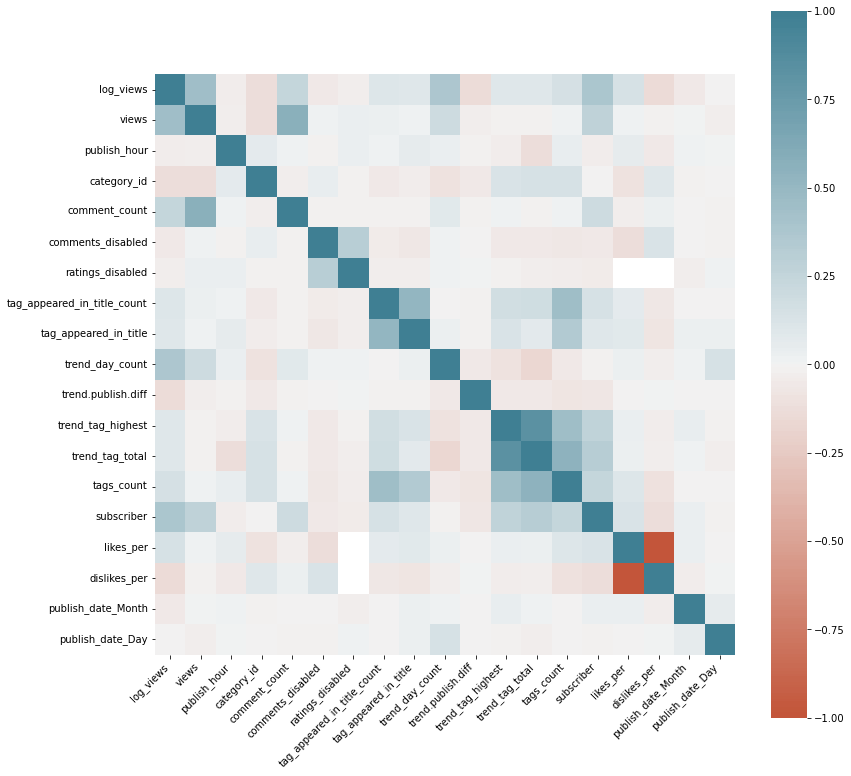

In [27]:
# Correlation Heat_map
fig,ax_corr = plt.subplots(1,1,figsize=(13, 13))

ax_corr = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax_corr.set_xticklabels(
    ax_corr.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

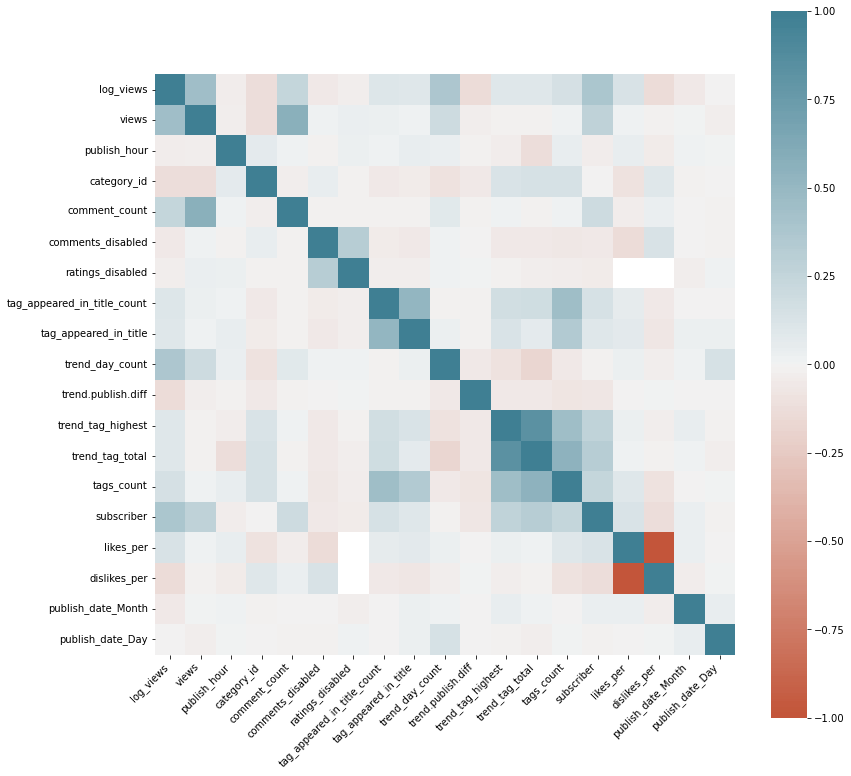

In [28]:
# Correlation Heat_map Selected_features
corr_matrix_s = df_selected.corr()

fig,ax_corr = plt.subplots(1,1,figsize=(13, 13))

ax_corr = sns.heatmap(
    corr_matrix_s, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax_corr.set_xticklabels(
    ax_corr.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Distribution

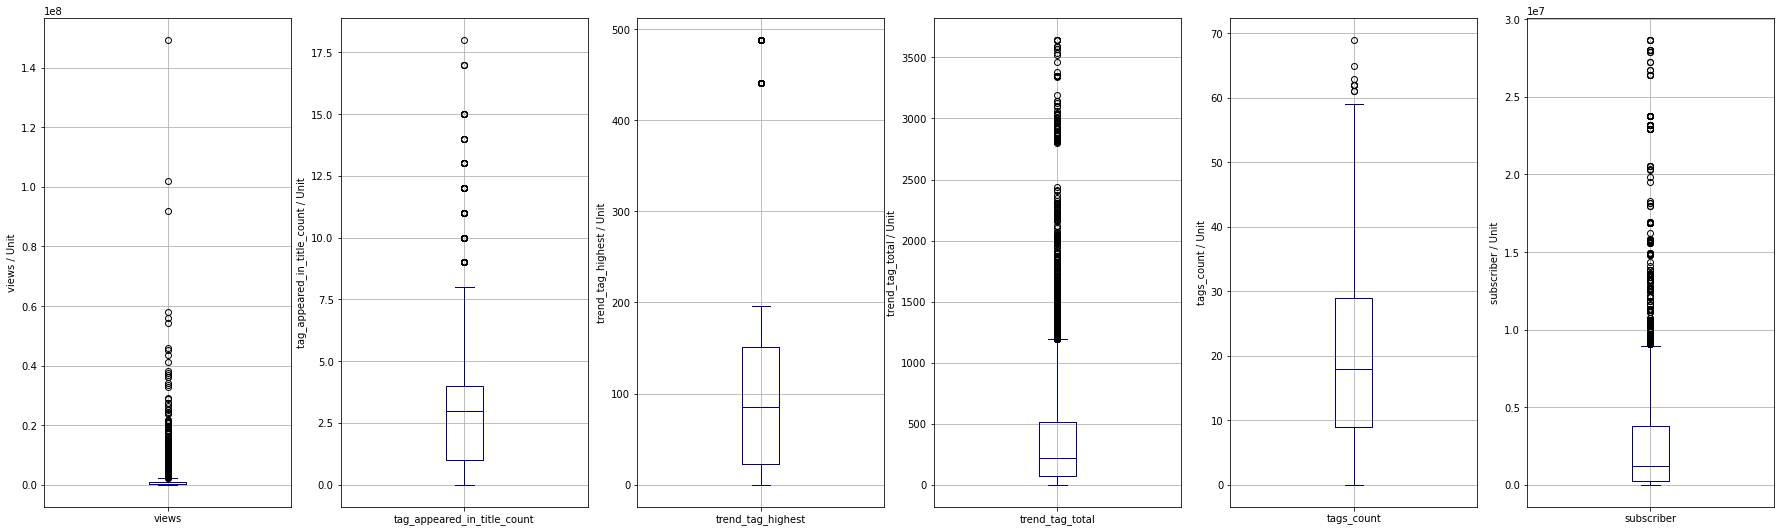

In [29]:
fig, ax = plt.subplots(1, len(numerics), figsize=(31, len(numerics)*1.5))
i = 0
for col in numerics:
    axo = df_numerics[col].plot(kind='box', ax=ax[i], showfliers=True, grid=True, color = "darkblue")
    axo.set_ylabel(col + ' / Unit')
    i += 1

#plt.tight_layout()
plt.show()

#### Views - TARGET Variable

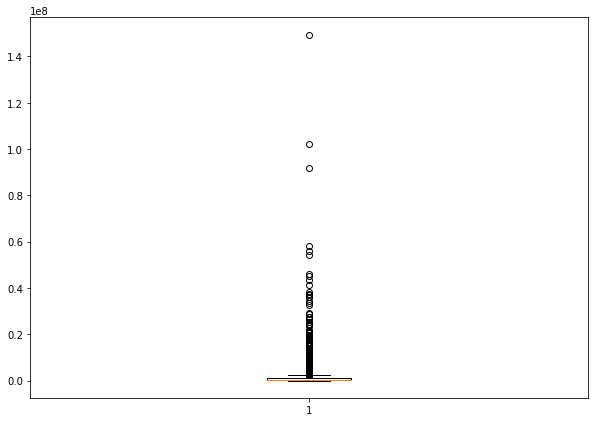

In [30]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df_update1["views"])
 
# show plot
plt.show()


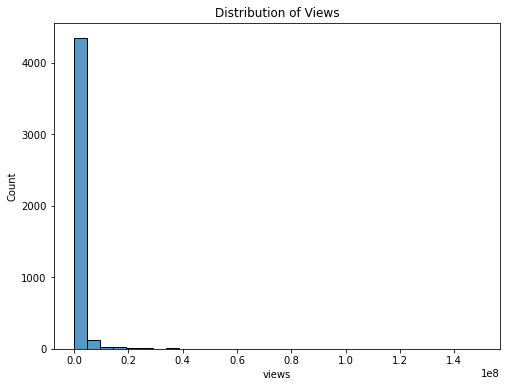

In [34]:
#VIEWS
plt.figure(figsize=(8, 6))
view_hist = sns.histplot(data=df_initial, x="views", bins=31);
view_hist.set(title='Distribution of Views');

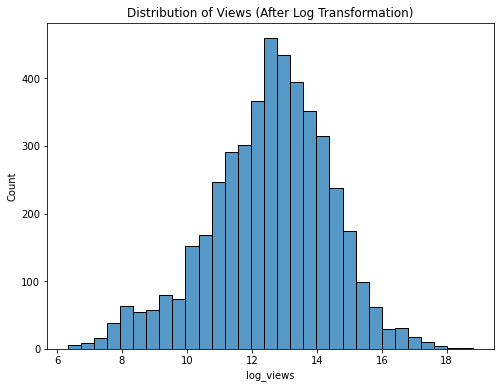

In [35]:
#VIEWS: Log scaled
plt.figure(figsize=(8, 6))
view_hist = sns.histplot(data = df_update1 , x= "log_views", bins=31);
view_hist.set(title='Distribution of Views (After Log Transformation)');

In [36]:
#df_views = pd.DataFrame(df_update1['views'])
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#df_views_std = scaler.fit_transform(df_views)

#### Number of tags - feature

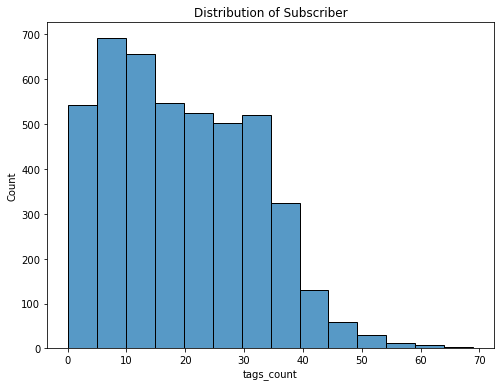

In [37]:
#Number of tags
plt.figure(figsize=(8, 6))
sns.histplot(data=df_update1, x="tags_count", bins=14).set(title='Distribution of Subscriber');

#### Subscriber (Probably need log scale as well) - feature

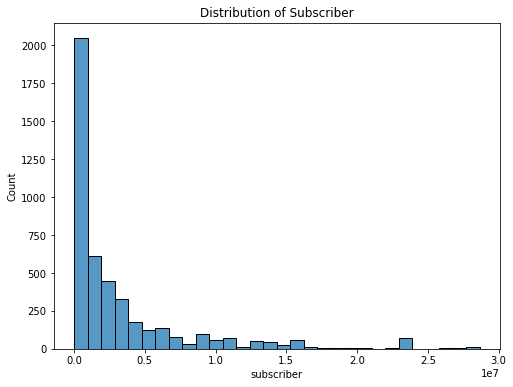

In [41]:
#Subscriber
plt.figure(figsize=(8, 6))
sns.histplot(data=df_update1, x="subscriber", bins=30).set(title='Distribution of Subscriber');
#Will do Log-transformation later

#### trend_tag_total - feature

/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


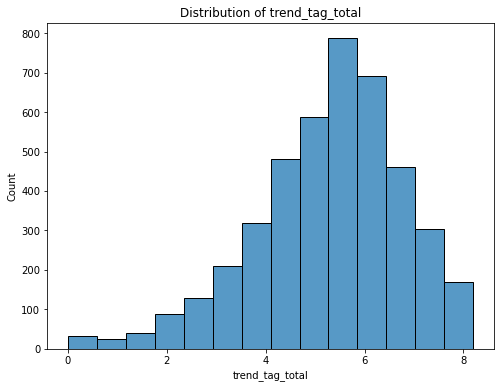

In [42]:
#Number of trend tags (total)
plt.figure(figsize=(8, 6))
sns.histplot(x=np.log(df_selected["trend_tag_total"]), bins=14).set(title='Distribution of trend_tag_total');

#### comments_count

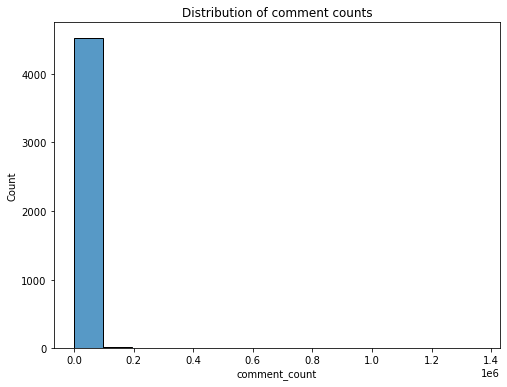

In [43]:
#Number of comments
plt.figure(figsize=(8, 6))
sns.histplot(data=df_update1, x="comment_count", bins=14).set(title='Distribution of comment counts');


/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


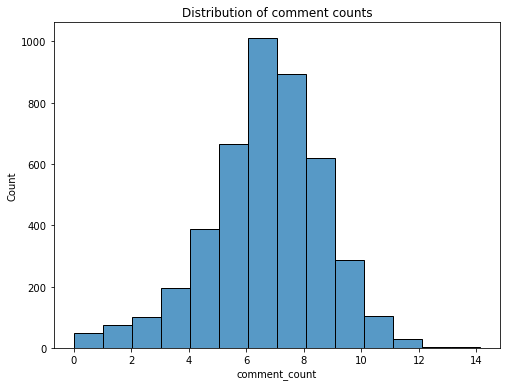

In [44]:
#Number of comments
plt.figure(figsize=(8, 6))
sns.histplot(x = np.log(df_update1["comment_count"]), bins=14).set(title='Distribution of comment counts');

#### publish_date_Month

In [45]:
df_update1["publish_date_Month"].value_counts()


1     1268
12    1167
2      991
11     972
3       87
10      17
5       11
9       10
6        8
4        6
8        6
7        4
Name: publish_date_Month, dtype: int64

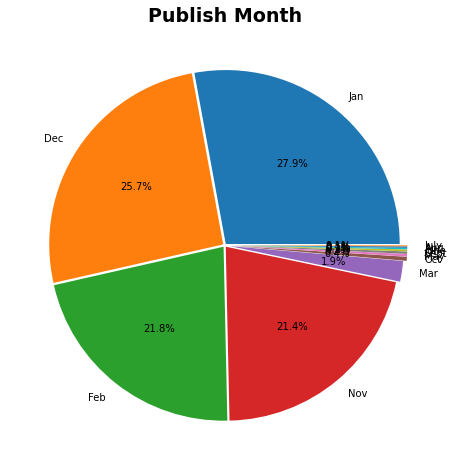

In [46]:
#publish month proportion

fig,ax_Pmonth = plt.subplots(1,1,figsize=(8, 8));



Pmonth_labels = ["Jan", "Dec", "Feb", "Nov", "Mar", "Oct", "May", "Sept", "June", "Apr", "Aug", "July"]
explode = (0.01, 0.01, 0.01, 0.01, 0.03, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

ax_Pmonth.pie(df_update1["publish_date_Month"].value_counts(), labels = Pmonth_labels, 
             explode=explode, autopct='%1.1f%%');

ax_Pmonth.set_title('Publish Month', fontsize = 19, fontweight = 'bold');

# show plot
plt.show();

In [47]:
#CREATE Labels
df_month = df_update1.copy()
df_month.loc[np.isin(df_month["publish_date_Month"], [4, 5, 6, 7, 8, 9]), "publish_date_Month"] = 0

In [48]:
df_month['publish_date_Month']

0       11
1       11
2       11
3       11
4       11
        ..
4542     3
4543     3
4544     3
4545     3
4546     2
Name: publish_date_Month, Length: 4547, dtype: int64

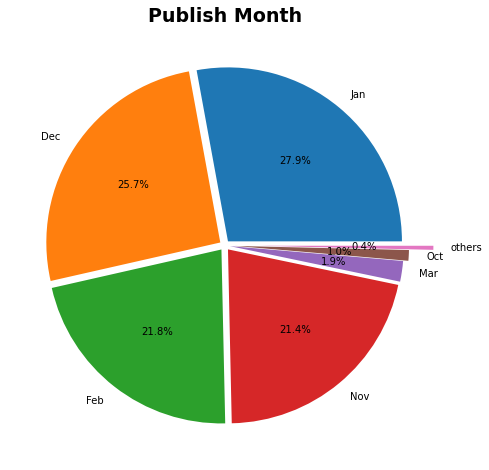

In [49]:
#publish month proportion

fig,ax_Pmonth = plt.subplots(1,1,figsize=(8, 8));



Pmonth_labels = ["Jan", "Dec", "Feb", "Nov", "Mar", "Oct", "others"]
explode = (0.03, 0.03, 0.03, 0.03, 0.03, 0.06, 0.2)

ax_Pmonth.pie(df_month["publish_date_Month"].value_counts(), labels = Pmonth_labels, 
             explode=explode, autopct='%1.1f%%');

ax_Pmonth.set_title('Publish Month', fontsize = 19, fontweight = 'bold');

# show plot
plt.show();

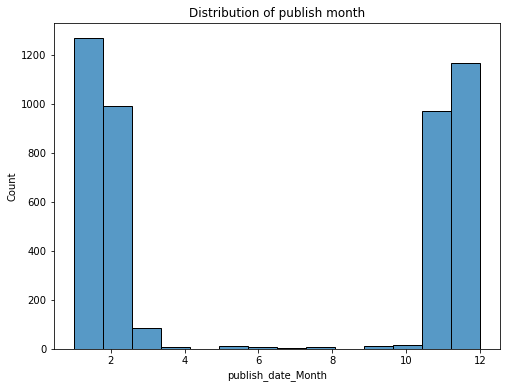

In [50]:
#Number of comments
plt.figure(figsize=(8, 6))
sns.histplot(data = df_update1, x = "publish_date_Month").set(title='Distribution of publish month');

#### category_id

In [51]:
df_update1["category_id"].value_counts()

24    1102
10     568
25     436
26     413
23     380
22     352
17     306
28     291
1      228
27     175
15     113
2       66
20      53
19      49
29      13
43       2
Name: category_id, dtype: int64

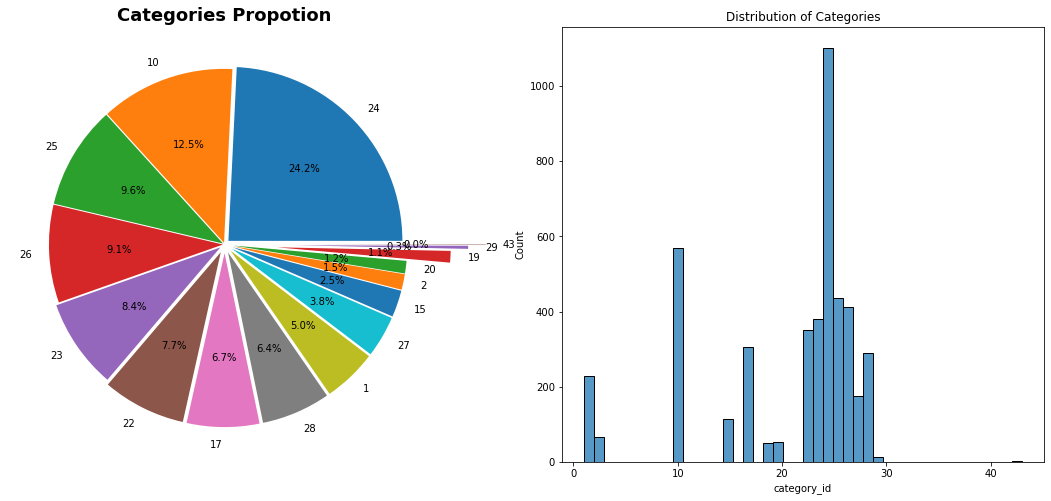

In [52]:
#category proportion

fig,ax_Pmonth = plt.subplots(1,2, figsize=(19, 8))

cate_labels = ["24", "10", "25", "26", "23", "22", "17", "28", "1", "27", "15", "2", "20", "19", "29", "43"]
explode = (0.03, 0.01, 0.01, 0.01, 0.03, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.3, 0.4, 0.5)

ax_Pmonth[0].pie(df_update1["category_id"].value_counts(), labels = cate_labels, 
              explode=explode, autopct='%1.1f%%');
ax_Pmonth[1] = sns.histplot(data = df_update1, x = 'category_id').set(title='Distribution of Categories');
ax_Pmonth[0].set_title('Categories Propotion', fontsize = 18, fontweight = 'bold');

# show plot
plt.show();

In [53]:
df_update1["category_id"]

0       22
1       24
2       23
3       24
4       24
        ..
4542    28
4543    28
4544    26
4545    20
4546    24
Name: category_id, Length: 4547, dtype: int64

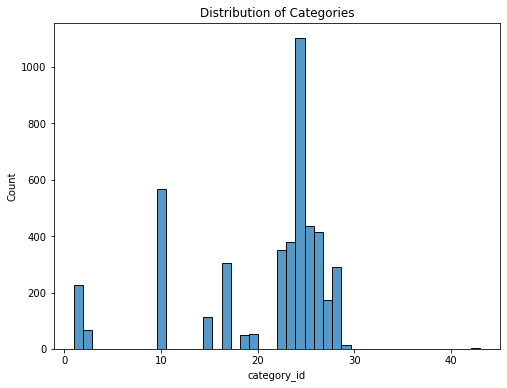

In [54]:
#Number of comments
plt.figure(figsize=(8, 6))
sns.histplot(data = df_update1, x = 'category_id').set(title='Distribution of Categories');

#### comments_disabled

In [55]:
df_update1["comments_disabled"].value_counts()


False    4471
True       76
Name: comments_disabled, dtype: int64

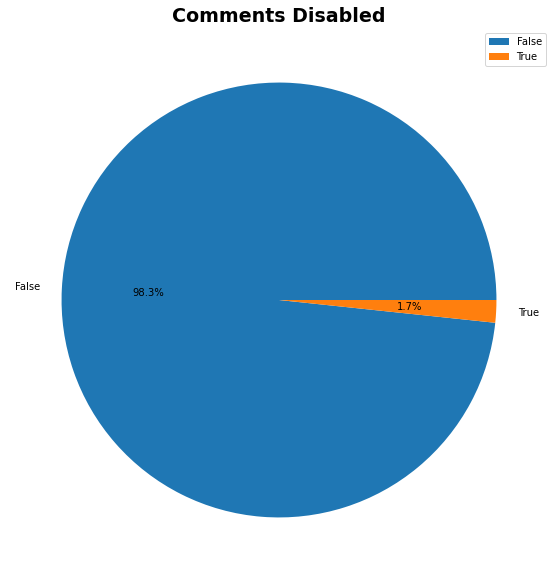

In [56]:
#comment_disabled proportion

fig,ax_cd = plt.subplots(1,1,figsize=(10, 10))

cd_labels = ["False", "True"]
#explode = (0, 0.3)

ax_cd.pie(df_update1["comments_disabled"].value_counts(), labels = cd_labels, autopct='%1.1f%%');
ax_cd.set_title('Comments Disabled', fontsize = 19, fontweight = 'bold');

##Take a look
plt.legend()

# show plot
plt.show();


#### ratings_disabled

In [57]:
df_update1["ratings_disabled"].value_counts()


False    4522
True       25
Name: ratings_disabled, dtype: int64

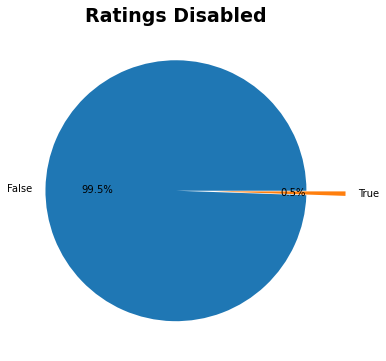

In [58]:
#comment_disabled proportion

fig,ax_rate = plt.subplots(1,1,figsize=(8, 6))

rate_labels = ["False", "True"]
explode = (0, 0.3)

ax_rate.pie(df_update1["ratings_disabled"].value_counts(), labels = rate_labels, 
              explode=explode, autopct='%1.1f%%');
ax_rate.set_title('Ratings Disabled', fontsize = 19, fontweight = 'bold');

# show plot
plt.show();

## Further Preprocessing for Selected Features

1. Views： Regression or Classification? 
Prediction: 
Target: log(Views) / likes_per
Features: publish_date(seperate), publish_hour, category_id, channel_title, comment_dis, rating_dis, tag_appeared_in_title_count, tag_appeared_in_title, title, tags, description, tags_count, subscriber



In [59]:
selected_features = ["views", "likes_per", "publish_hour", "publish_date_Month", "publish_date_Day", "category_id", 
                     "comments_disabled", "ratings_disabled", "tag_appeared_in_title_count", "tag_appeared_in_title", 
                     "trend_tag_highest", "trend_tag_total", "tags_count", "subscriber", "channel_title", "title", 
                     "tags", "description"]

text_cols = ["channel_title", "title", "tags", "description"]


#Channel title, title, tags, description
#"views", "log_comment_count", "log_subscriber", "log_tags_count",# 

#### Numerical

In [60]:
#df_selected['subscriber'] = np.where(df_selected['subscriber'] == 0, 10**-10, df_selected['subscriber'])


In [61]:
#Drop missing values in subscriber
df_selected = df_update1[selected_features]
df_selected = df_selected.dropna(subset = ['subscriber'])
df_selected = df_selected.astype({'subscriber':'int64'})
#df_selected['log_subscriber'] = np.log(df_selected['subscriber'])

In [62]:
#GET DUMMIES (One-Hot-Encoding) FOR CATEGORICALS
df_fit = pd.get_dummies(df_selected, columns = ['publish_hour','publish_date_Month', 'publish_date_Day', 'category_id'], 
                       dtype = 'int8')


In [63]:
#Change Boolean variables to 1 and 0s
df_fit = df_fit.astype({'comments_disabled':'int64', 'ratings_disabled':'int64', 
                        'tag_appeared_in_title':'int64'})

#### text

In [64]:
for text_col in text_cols:
    df_fit[text_col].fillna("", inplace=True)
    
# Dropping nan rows
df_fit.dropna(axis='index', how='any', inplace=True)
print(df_fit.shape)
df_fit.isna().sum().sort_values(ascending=False)

(4500, 97)


views                    0
publish_date_Month_12    0
publish_date_Day_22      0
publish_date_Day_21      0
publish_date_Day_20      0
                        ..
publish_hour_16          0
publish_hour_15          0
publish_hour_14          0
publish_hour_13          0
category_id_43           0
Length: 97, dtype: int64

In [65]:
df_fit["tags"] = df_fit.apply(lambda row: row["tags"].replace("|", " "), axis=1)

## Define features and target + Text Preprocessing

In [66]:
target = np.log(df_fit['views'])
#target = df_fit['views']
features = df_fit.drop(columns = ["views", "likes_per"])

In [67]:
#Train test Split
X_dev, X_test, y_dev, y_test = train_test_split(features, target, 
                                                test_size = 0.2, 
                                                random_state = 42)

# resetting indices on split data
X_dev.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_dev.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

#### Text Preprocessing

In [68]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import RFE, RFECV, SequentialFeatureSelector
from wordcloud import WordCloud, STOPWORDS
import re

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /Users/hshen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/hshen/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [69]:
#sw = STOPWORDS

In [70]:
def clean_text(text, remove_stopwords=False, use_lemmatization=False):
    # Removing URLs 
    text = re.sub(r"http\S+", "", text)
    html = re.compile(r'<.*?>') 
    text = html.sub(r'',text)
    
    # Removing punctuations
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`" + '_'
    for p in punctuations:
        text = text.replace(p,'')
        
    # Removing stopwords
    if remove_stopwords or use_lemmatization:
        text = [word.lower() for word in text.split()]
      
      # Lemmatization
        if use_lemmatization:
            lemmatizer = WordNetLemmatizer()
            text = [lemmatizer.lemmatize(word) for word in text]
      
        text = " ".join(text) 

    return text

In [71]:
def text_preprocessing(X_dev, X_test, text_cols, vectorizer,
                  remove_stopwords=False, use_lemmatization=False, 
                  use_lsa= False):
    # Getting correct types of dataframe to cast values to correct type
    col_types = dict()

    i = 0
    for text_col in text_cols:
        # Applying tf-idf vectorization to text values

        # Working on development/train data
        text_column = X_dev.pop(text_col) # getting text columns
        text_column = text_column.fillna("")
        # Cleaning text
        text_column = text_column.apply(
            lambda x: clean_text(x, remove_stopwords, use_lemmatization)
        )
        # Getting new numerical representation of this column
        # May now be represented by more than 1 column
        tfidf_cols = vectorizer.fit_transform(text_column)
        _, numfeats = tfidf_cols.shape
        # Converting column names to be specific for this type of text
        tfidf_col_names = list()
        for feat in range(numfeats):
            tfidf_col_name = text_col + "_" + str(feat)
            tfidf_col_names.append(tfidf_col_name)
            col_types[tfidf_col_name] = 'float'

        tfidf_cols = pd.DataFrame(tfidf_cols.todense(), columns=tfidf_col_names)
    
        if use_lsa:
            scaler = MaxAbsScaler()
            tfidf_cols = scaler.fit_transform(tfidf_cols)

            if use_lsa:
                lsa_scaled = TruncatedSVD(n_components=100)
                tfidf_cols = lsa_scaled.fit_transform(tfidf_cols)
      
            tfidf_cols = pd.DataFrame(tfidf_cols, columns=tfidf_col_names[:100])


        X_dev = pd.concat([X_dev, tfidf_cols], axis=1)
    
        # Working on test/validation data
        text_column = X_test.pop(text_col)
        text_column = text_column.fillna("")
        # Cleaning text
        text_column = text_column.apply(
            lambda x: clean_text(x, remove_stopwords, use_lemmatization)
        )
        tfidf_cols = vectorizer.transform(text_column)
        # Converting column names to be specific for this type of text
        tfidf_cols = pd.DataFrame(tfidf_cols.todense(), columns=tfidf_col_names)
        if use_lsa:
            tfidf_cols = scaler.transform(tfidf_cols)
      
            if use_lsa:
                tfidf_cols = lsa_scaled.transform(tfidf_cols)
      
            tfidf_cols = pd.DataFrame(tfidf_cols, columns=tfidf_col_names[:100])
    
        X_test = pd.concat([X_test, tfidf_cols], axis=1)

        i += 1

    if not use_lsa:
        for col in list(X_dev.columns):
            col_types[col] = "int64"

        X_dev = X_dev.astype(col_types)
        X_test = X_test.astype(col_types)

    return X_dev, X_test


In [72]:
#vectorizer = TfidfVectorizer(max_features=250, strip_accents='unicode', 
                            #lowercase=True, stop_words='english')

vectorizer = CountVectorizer(stop_words='english', min_df=4)

x_dev, x_test = text_preprocessing(
    X_dev, X_test, text_cols, 
    vectorizer, use_lsa = True
)

## Models Training

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error


#### Linear Regression

In [74]:
# sc = StandardScaler()
# x_dev_scaled = sc.fit_transform(x_dev)
# x_test_scaled = sc.transform(x_test)

#lin_PCA = PCA(n_components = 250).fit(x_dev)
#x_dev_PCA = lin_PCA.transform(x_dev)
#x_test_PCA = lin_PCA.transform(x_test)
linearReg = LinearRegression().fit(x_dev, y_dev)
y_pred = linearReg.predict(x_test)
r2_train = linearReg.score(x_dev, y_dev)
r2_test = linearReg.score(x_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
results = mean_squared_error(y_test, y_pred, squared = False)

print("Linear Regression")
print("Train set R^2: ", r2_train)
print("Test set R^2: ", r2_test)
print("Test set MAE: ", mae)
print("Test set RMSE: ", results)

Linear Regression
Train set R^2:  0.468437866294134
Test set R^2:  0.3593939493174493
Test set MAE:  1.141080200243279
Test set RMSE:  1.4621821315716368


In [75]:
log_inverse_mae = mean_absolute_error(np.exp(y_test), np.exp(y_pred))
log_inverse_rmse = mean_squared_error(np.exp(y_test), np.exp(y_pred), squared = False)
print("Test set MAE(log_inversed): ", log_inverse_mae)
print("Test set RMSE(log_inversed): ", log_inverse_rmse)

Test set MAE(log_inversed):  1089373.982721852
Test set RMSE(log_inversed):  4793645.742400605


#### Ridge Regression

In [76]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler

# ridge_PCA = PCA(n_components = 10).fit(x_dev)
# x_dev_PCA = ridge_PCA.transform(x_dev)
# x_test_PCA = ridge_PCA.transform(x_test)
# ridge_reg = Ridge().fit(x_dev_PCA, y_dev)
# y_pred = ridge_reg.predict(x_test_PCA)
# r2_train = ridge_reg.score(x_dev_PCA, y_dev)
# r2_test = ridge_reg.score(x_test_PCA, y_test)
# results = mean_squared_error(y_test, y_pred, squared = False)

# print("Ridge Regression")
# print("Train set R^2: ", r2_train)
# print("Test set R^2: ", r2_test)
# print("Test set RMSE: ", results)

norm = MinMaxScaler()
x_dev_norm = norm.fit_transform(x_dev)
x_test_norm = norm.transform(x_test)

ridge_reg = Ridge().fit(x_dev_norm, y_dev)
y_pred = ridge_reg.predict(x_test_norm)
r2_train = ridge_reg.score(x_dev_norm, y_dev)
r2_test = ridge_reg.score(x_test_norm, y_test)
mae = mean_absolute_error(y_test, y_pred)
results = mean_squared_error(y_test, y_pred, squared = False)

print("Ridge Regression")
print("Train set R^2: ", r2_train)
print("Test set R^2: ", r2_test)
print("Test set MAE: ", mae)
print("Test set RMSE: ", results)


Ridge Regression
Train set R^2:  0.455424799140564
Test set R^2:  0.3735507898002265
Test set MAE:  1.1281955388592453
Test set RMSE:  1.445935389195851


In [77]:
log_inverse_mae = mean_absolute_error(np.exp(y_test), np.exp(y_pred))
log_inverse_rmse = mean_squared_error(np.exp(y_test), np.exp(y_pred), squared = False)
print("Test set MAE(log_inversed): ", log_inverse_mae)
print("Test set RMSE(log_inversed): ", log_inverse_rmse)

Test set MAE(log_inversed):  993071.6168649552
Test set RMSE(log_inversed):  4017148.8228755062


#### Random Forest Regressor

In [78]:
from sklearn.ensemble import RandomForestRegressor

# rf_PCA = PCA(n_components = 250).fit(x_dev)
# x_dev_PCA = rf_PCA.transform(x_dev)
# x_test_PCA = rf_PCA.transform(x_test)

# rf_reg = RandomForestRegressor().fit(x_dev_PCA, y_dev)
# y_pred = rf_reg.predict(x_test_PCA)
# r2_train = rf_reg.score(x_dev_PCA, y_dev)
# r2_test = rf_reg.score(x_test_PCA, y_test)
# results = mean_squared_error(y_test, y_pred, squared = False)

# print("Random Forest Regressor")
# print("Train set R^2: ", r2_train)
# print("Test set R^2: ", r2_test)
# print("Test set RMSE: ", results)


rf_reg = RandomForestRegressor().fit(x_dev, y_dev)
y_pred = rf_reg.predict(x_test)
r2_train = rf_reg.score(x_dev, y_dev)
r2_test = rf_reg.score(x_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
results = mean_squared_error(y_test, y_pred, squared = False)

print("Random Forest Regressor")
print("Train set R^2: ", r2_train)
print("Test set R^2: ", r2_test)
print("Test set MAE: ", mae)
print("Test set RMSE: ", results)


Random Forest Regressor
Train set R^2:  0.9179745736084469
Test set R^2:  0.4433201658564455
Test set MAE:  1.0404043139576453
Test set RMSE:  1.3630403071305086


In [79]:
log_inverse_mae = mean_absolute_error(np.exp(y_test), np.exp(y_pred))
log_inverse_rmse = mean_squared_error(np.exp(y_test), np.exp(y_pred), squared = False)
print("Test set MAE(log_inversed): ", log_inverse_mae)
print("Test set RMSE(log_inversed): ", log_inverse_rmse)

Test set MAE(log_inversed):  830988.8128251653
Test set RMSE(log_inversed):  3084956.1172657707


#### AdaBoost Regressor

In [80]:
from sklearn.ensemble import AdaBoostRegressor

# ada_PCA = PCA(n_components = 10).fit(x_dev)
# x_dev_PCA = ada_PCA.transform(x_dev)
# x_test_PCA = ada_PCA.transform(x_test)
# ada_reg = AdaBoostRegressor().fit(x_dev_PCA, y_dev)
# y_pred = ada_reg.predict(x_test_PCA)
# r2_train = ada_reg.score(x_dev_PCA, y_dev)
# r2_test = ada_reg.score(x_test_PCA, y_test)
# results = mean_squared_error(y_test, y_pred, squared = False)

# print("Random Forest Regressor")
# print("Train set R^2: ", r2_train)
# print("Test set R^2: ", r2_test)
# print("Test set RMSE: ", results)


ada_reg = AdaBoostRegressor().fit(x_dev, y_dev)
y_pred = ada_reg.predict(x_test)
r2_train = ada_reg.score(x_dev, y_dev)
r2_test = ada_reg.score(x_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
results = mean_squared_error(y_test, y_pred, squared = False)

print("AdaBoost Regressor")
print("Train set R^2: ", r2_train)
print("Test set R^2: ", r2_test)
print("Test set MAE: ", mae)
print("Test set RMSE: ", results)


AdaBoost Regressor
Train set R^2:  0.4219360993895377
Test set R^2:  0.3307984317121274
Test set MAE:  1.1909056051657947
Test set RMSE:  1.494460460401666


In [81]:
log_inverse_mae = mean_absolute_error(np.exp(y_test), np.exp(y_pred))
log_inverse_rmse = mean_squared_error(np.exp(y_test), np.exp(y_pred), squared = False)
print("Test set MAE(log_inversed): ", log_inverse_mae)
print("Test set RMSE(log_inversed): ", log_inverse_rmse)

Test set MAE(log_inversed):  935083.5304176211
Test set RMSE(log_inversed):  3346189.055432835


#### XGBoost

In [82]:
from xgboost import XGBRegressor

# ada_PCA = PCA(n_components = 1).fit(x_dev)
# x_dev_PCA = ada_PCA.transform(x_dev)
# x_test_PCA = ada_PCA.transform(x_test)
# xg_reg = XGBRegressor().fit(x_dev_PCA, y_dev)
# y_pred = xg_reg.predict(x_test_PCA)
# r2_train = xg_reg.score(x_dev_PCA, y_dev)
# r2_test = xg_reg.score(x_test_PCA, y_test)
# mae = mean_absolute_error(y_test, y_pred)
# results = mean_squared_error(y_test, y_pred, squared = False)

# print("XGBoost Regressor")
# print("Train set R^2: ", r2_train)
# print("Test set R^2: ", r2_test)
# print("Test set MAE: ", mae)
# print("Test set RMSE: ", results)


xg_reg = XGBRegressor().fit(x_dev, y_dev)
y_pred = xg_reg.predict(x_test)
r2_train = xg_reg.score(x_dev, y_dev)
r2_test = xg_reg.score(x_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
results = mean_squared_error(y_test, y_pred, squared = False)

print("XGBoost Regressor")
print("Train set R^2: ", r2_train)
print("Test set R^2: ", r2_test)
print("Test set MAE: ", mae)
print("Test set RMSE: ", results)

/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBoost Regressor
Train set R^2:  0.9965914877548707
Test set R^2:  0.4123787127740065
Test set MAE:  1.0804627968002432
Test set RMSE:  1.4004084230976424


In [83]:
log_inverse_mae = mean_absolute_error(np.exp(y_test), np.exp(y_pred))
log_inverse_rmse = mean_squared_error(np.exp(y_test), np.exp(y_pred), squared = False)
print("Test set MAE(log_inversed): ", log_inverse_mae)
print("Test set RMSE(log_inversed): ", log_inverse_rmse)

Test set MAE(log_inversed):  861715.6248855252
Test set RMSE(log_inversed):  3105289.6474788347


#### CATBoost

In [84]:
from catboost import CatBoostRegressor
cat_reg = CatBoostRegressor().fit(x_dev, y_dev)
y_pred = cat_reg.predict(x_test)
r2_train = cat_reg.score(x_dev, y_dev)
r2_test = cat_reg.score(x_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
results = mean_squared_error(y_test, y_pred, squared = False)

print("Random Forest Regressor")
print("Train set R^2: ", r2_train)
print("Test set R^2: ", r2_test)
print("Test set MAE: ", mae)
print("Test set RMSE: ", results)

Learning rate set to 0.050127
0:	learn: 1.8392801	total: 95.8ms	remaining: 1m 35s
1:	learn: 1.8194151	total: 109ms	remaining: 54.3s
2:	learn: 1.8003207	total: 120ms	remaining: 40s
3:	learn: 1.7797675	total: 134ms	remaining: 33.3s
4:	learn: 1.7617655	total: 145ms	remaining: 28.9s
5:	learn: 1.7446230	total: 157ms	remaining: 26.1s
6:	learn: 1.7289988	total: 169ms	remaining: 24s
7:	learn: 1.7144351	total: 181ms	remaining: 22.5s
8:	learn: 1.7015756	total: 193ms	remaining: 21.3s
9:	learn: 1.6906542	total: 206ms	remaining: 20.4s
10:	learn: 1.6787144	total: 219ms	remaining: 19.7s
11:	learn: 1.6677068	total: 231ms	remaining: 19.1s
12:	learn: 1.6572016	total: 244ms	remaining: 18.5s
13:	learn: 1.6462470	total: 256ms	remaining: 18s
14:	learn: 1.6384855	total: 268ms	remaining: 17.6s
15:	learn: 1.6278383	total: 279ms	remaining: 17.2s
16:	learn: 1.6200662	total: 291ms	remaining: 16.8s
17:	learn: 1.6114320	total: 304ms	remaining: 16.6s
18:	learn: 1.6044036	total: 317ms	remaining: 16.4s
19:	learn: 1.59

162:	learn: 1.2431720	total: 2.25s	remaining: 11.5s
163:	learn: 1.2411126	total: 2.26s	remaining: 11.5s
164:	learn: 1.2395258	total: 2.27s	remaining: 11.5s
165:	learn: 1.2375354	total: 2.29s	remaining: 11.5s
166:	learn: 1.2362047	total: 2.3s	remaining: 11.5s
167:	learn: 1.2352857	total: 2.31s	remaining: 11.4s
168:	learn: 1.2340457	total: 2.32s	remaining: 11.4s
169:	learn: 1.2317847	total: 2.33s	remaining: 11.4s
170:	learn: 1.2302577	total: 2.34s	remaining: 11.4s
171:	learn: 1.2288540	total: 2.36s	remaining: 11.3s
172:	learn: 1.2273437	total: 2.37s	remaining: 11.3s
173:	learn: 1.2260549	total: 2.38s	remaining: 11.3s
174:	learn: 1.2242388	total: 2.39s	remaining: 11.3s
175:	learn: 1.2221895	total: 2.4s	remaining: 11.2s
176:	learn: 1.2195976	total: 2.41s	remaining: 11.2s
177:	learn: 1.2171543	total: 2.42s	remaining: 11.2s
178:	learn: 1.2160142	total: 2.44s	remaining: 11.2s
179:	learn: 1.2136593	total: 2.45s	remaining: 11.2s
180:	learn: 1.2123438	total: 2.46s	remaining: 11.2s
181:	learn: 1.

323:	learn: 0.9886504	total: 4.28s	remaining: 8.93s
324:	learn: 0.9866447	total: 4.29s	remaining: 8.91s
325:	learn: 0.9858452	total: 4.3s	remaining: 8.9s
326:	learn: 0.9841504	total: 4.32s	remaining: 8.89s
327:	learn: 0.9827725	total: 4.33s	remaining: 8.87s
328:	learn: 0.9814463	total: 4.34s	remaining: 8.86s
329:	learn: 0.9803942	total: 4.35s	remaining: 8.84s
330:	learn: 0.9790468	total: 4.37s	remaining: 8.83s
331:	learn: 0.9777968	total: 4.38s	remaining: 8.81s
332:	learn: 0.9766381	total: 4.39s	remaining: 8.8s
333:	learn: 0.9753312	total: 4.41s	remaining: 8.79s
334:	learn: 0.9737721	total: 4.42s	remaining: 8.77s
335:	learn: 0.9722293	total: 4.43s	remaining: 8.76s
336:	learn: 0.9717899	total: 4.44s	remaining: 8.74s
337:	learn: 0.9703695	total: 4.45s	remaining: 8.72s
338:	learn: 0.9690550	total: 4.47s	remaining: 8.71s
339:	learn: 0.9667331	total: 4.48s	remaining: 8.69s
340:	learn: 0.9648517	total: 4.49s	remaining: 8.68s
341:	learn: 0.9635927	total: 4.5s	remaining: 8.66s
342:	learn: 0.96

489:	learn: 0.7856050	total: 6.32s	remaining: 6.57s
490:	learn: 0.7845011	total: 6.33s	remaining: 6.56s
491:	learn: 0.7835669	total: 6.34s	remaining: 6.55s
492:	learn: 0.7825003	total: 6.35s	remaining: 6.53s
493:	learn: 0.7809736	total: 6.36s	remaining: 6.52s
494:	learn: 0.7802980	total: 6.38s	remaining: 6.51s
495:	learn: 0.7791990	total: 6.39s	remaining: 6.49s
496:	learn: 0.7785912	total: 6.41s	remaining: 6.49s
497:	learn: 0.7773645	total: 6.42s	remaining: 6.47s
498:	learn: 0.7762599	total: 6.43s	remaining: 6.46s
499:	learn: 0.7752807	total: 6.45s	remaining: 6.45s
500:	learn: 0.7739182	total: 6.46s	remaining: 6.43s
501:	learn: 0.7730705	total: 6.47s	remaining: 6.42s
502:	learn: 0.7719338	total: 6.48s	remaining: 6.41s
503:	learn: 0.7713188	total: 6.5s	remaining: 6.39s
504:	learn: 0.7707274	total: 6.51s	remaining: 6.38s
505:	learn: 0.7696040	total: 6.52s	remaining: 6.37s
506:	learn: 0.7684400	total: 6.54s	remaining: 6.36s
507:	learn: 0.7675905	total: 6.55s	remaining: 6.34s
508:	learn: 0

652:	learn: 0.6363207	total: 8.36s	remaining: 4.44s
653:	learn: 0.6353978	total: 8.37s	remaining: 4.43s
654:	learn: 0.6349672	total: 8.39s	remaining: 4.42s
655:	learn: 0.6342668	total: 8.4s	remaining: 4.4s
656:	learn: 0.6332737	total: 8.41s	remaining: 4.39s
657:	learn: 0.6325400	total: 8.42s	remaining: 4.38s
658:	learn: 0.6318510	total: 8.43s	remaining: 4.36s
659:	learn: 0.6311618	total: 8.45s	remaining: 4.35s
660:	learn: 0.6299199	total: 8.46s	remaining: 4.34s
661:	learn: 0.6293165	total: 8.47s	remaining: 4.32s
662:	learn: 0.6286209	total: 8.48s	remaining: 4.31s
663:	learn: 0.6279367	total: 8.49s	remaining: 4.3s
664:	learn: 0.6271263	total: 8.51s	remaining: 4.29s
665:	learn: 0.6263338	total: 8.52s	remaining: 4.27s
666:	learn: 0.6256273	total: 8.53s	remaining: 4.26s
667:	learn: 0.6249338	total: 8.54s	remaining: 4.25s
668:	learn: 0.6240312	total: 8.55s	remaining: 4.23s
669:	learn: 0.6230987	total: 8.57s	remaining: 4.22s
670:	learn: 0.6221745	total: 8.58s	remaining: 4.21s
671:	learn: 0.6

819:	learn: 0.5237528	total: 10.5s	remaining: 2.31s
820:	learn: 0.5231161	total: 10.5s	remaining: 2.3s
821:	learn: 0.5224803	total: 10.5s	remaining: 2.28s
822:	learn: 0.5219048	total: 10.6s	remaining: 2.27s
823:	learn: 0.5213818	total: 10.6s	remaining: 2.26s
824:	learn: 0.5207322	total: 10.6s	remaining: 2.24s
825:	learn: 0.5198627	total: 10.6s	remaining: 2.23s
826:	learn: 0.5191960	total: 10.6s	remaining: 2.22s
827:	learn: 0.5185065	total: 10.6s	remaining: 2.21s
828:	learn: 0.5181972	total: 10.6s	remaining: 2.2s
829:	learn: 0.5177130	total: 10.7s	remaining: 2.18s
830:	learn: 0.5170527	total: 10.7s	remaining: 2.17s
831:	learn: 0.5164821	total: 10.7s	remaining: 2.16s
832:	learn: 0.5155715	total: 10.7s	remaining: 2.15s
833:	learn: 0.5150254	total: 10.7s	remaining: 2.14s
834:	learn: 0.5144882	total: 10.8s	remaining: 2.13s
835:	learn: 0.5136541	total: 10.8s	remaining: 2.11s
836:	learn: 0.5128862	total: 10.8s	remaining: 2.1s
837:	learn: 0.5118653	total: 10.8s	remaining: 2.09s
838:	learn: 0.5

979:	learn: 0.4323141	total: 12.6s	remaining: 258ms
980:	learn: 0.4316247	total: 12.6s	remaining: 245ms
981:	learn: 0.4312174	total: 12.7s	remaining: 232ms
982:	learn: 0.4308449	total: 12.7s	remaining: 219ms
983:	learn: 0.4304530	total: 12.7s	remaining: 206ms
984:	learn: 0.4298868	total: 12.7s	remaining: 193ms
985:	learn: 0.4296278	total: 12.7s	remaining: 180ms
986:	learn: 0.4290463	total: 12.7s	remaining: 168ms
987:	learn: 0.4284639	total: 12.7s	remaining: 155ms
988:	learn: 0.4280038	total: 12.8s	remaining: 142ms
989:	learn: 0.4272923	total: 12.8s	remaining: 129ms
990:	learn: 0.4264207	total: 12.8s	remaining: 116ms
991:	learn: 0.4256719	total: 12.8s	remaining: 103ms
992:	learn: 0.4248615	total: 12.8s	remaining: 90.3ms
993:	learn: 0.4245231	total: 12.8s	remaining: 77.4ms
994:	learn: 0.4240622	total: 12.8s	remaining: 64.5ms
995:	learn: 0.4236894	total: 12.8s	remaining: 51.6ms
996:	learn: 0.4229336	total: 12.9s	remaining: 38.7ms
997:	learn: 0.4223076	total: 12.9s	remaining: 25.8ms
998:	l

In [85]:
#Result for CatBoost Regressor
print("CATBoost Regressor")
print("Train set R^2: ", r2_train)
print("Test set R^2: ", r2_test)
print("Test set MAE: ", mae)
print("Test set RMSE: ", results)

CATBoost Regressor
Train set R^2:  0.9486367674272759
Test set R^2:  0.4476776312805687
Test set MAE:  1.0423150009307918
Test set RMSE:  1.357695161530151


In [86]:
log_inverse_mae = mean_absolute_error(np.exp(y_test), np.exp(y_pred))
log_inverse_rmse = mean_squared_error(np.exp(y_test), np.exp(y_pred), squared = False)
print("Test set MAE(log_inversed): ", log_inverse_mae)
print("Test set RMSE(log_inversed): ", log_inverse_rmse)

Test set MAE(log_inversed):  832020.0898149977
Test set RMSE(log_inversed):  3035431.9940849664


# Hyperparameters Tuning - Target: Views

In [87]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 
from sklearn.decomposition import PCA, KernelPCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

cv = KFold(n_splits=5, random_state=42, shuffle=True)


#### Random Forest Regressor

In [380]:
# With PCA
# 10-FOLD CROSS-VALIDATED ACCURACY AND PRECISION
warnings.filterwarnings("ignore")

steps = [('pca', PCA()), ('rf', RandomForestRegressor(random_state = 0))]
model_rf = Pipeline(steps = steps)

# Creating space for different hyperparameters
space = dict()
space['pca__n_components'] = [None, 5, 10, 15, 20, 30, 50, 100, 150, 200, 250]

# Search
search = GridSearchCV(model_rf, space, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, verbose = 2)
result = search.fit(x_dev, y_dev)

#Print Result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
Best Score: -1.494215089413784
Best Hyperparameters: {'pca__n_components': 150}
[CV] END ................................pca__n_components=5; total time=   2.9s
[CV] END ...............................pca__n_components=15; total time=   3.4s
[CV] END ...............................pca__n_components=30; total time=   6.4s
[CV] END ..............................pca__n_components=100; total time=  20.0s
[CV] END ..............................pca__n_components=200; total time=  38.8s
[CV] END .............................pca__n_components=None; total time=  51.6s
[CV] END ..............................pca__n_components=200; total time=  36.3s
[CV] END ...............................pca__n_components=10; total time=   3.9s
[CV] END ...............................pca__n_components=20; total time=   4.3s
[CV] END ...............................pca__n_components=50; total time=  10.2s
[CV] END ..............................pca__n_com

In [381]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -1.494215089413784
Best Hyperparameters: {'pca__n_components': 150}


In [ ]:
# With PCA: n_components = 150
# 10-FOLD CROSS-VALIDATED ACCURACY AND PRECISION
warnings.filterwarnings("ignore")

steps = [('pca', PCA(n_components = 150)), ('rf', RandomForestRegressor(random_state = 0))]
model_rf = Pipeline(steps = steps)

# Creating space for different hyperparameters
space = dict()
space['rf__n_estimators'] = [50, 100, 150, 200, 300, 400]
space['rf__max_depth'] = [None, 5, 10, 14, 19, 30]
space['rf__criterion'] = ['squared_error', 'absolute_error', 'poisson']

# Search
search = GridSearchCV(model_rf, space, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, verbose = 2)
result = search.fit(x_dev, y_dev_r)


#Print Result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

In [ ]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

In [ ]:
# Without PCA
# 10-FOLD CROSS-VALIDATED ACCURACY AND PRECISION
warnings.filterwarnings("ignore")

model_rf = RandomForestRegressor(random_state = 0)

# Creating space for different hyperparameters
space = dict()
space['n_estimators'] = [50, 100, 150, 200, 300, 400]
space['max_depth'] = [None, 5, 10, 14, 19, 25, 30]
space['criterion'] = ['squared_error', 'absolute_error', 'poisson']

# Search
search = GridSearchCV(model_rf, space, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, verbose = 2)
result = search.fit(x_dev, y_dev)

#Print Result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

In [211]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -4243027.1747103585
Best Hyperparameters: {'rf__criterion': 'absolute_error', 'rf__max_depth': 10, 'rf__n_estimators': 150}


In [297]:
rf_PCA = PCA(n_components = 20).fit(x_dev)
x_dev_PCA = rf_PCA.transform(x_dev)
x_test_PCA = rf_PCA.transform(x_test)
rf_reg = RandomForestRegressor(n_estimators = 150, max_depth = 10, criterion = 'absolute_error', n_jobs=-1).fit(x_dev_PCA, y_dev)
y_pred = rf_reg.predict(x_test_PCA)

r2_train = rf_reg.score(x_dev_PCA, y_dev)
r2_test = rf_reg.score(x_test_PCA, y_test)
mae = mean_absolute_error(y_test, y_pred)
results = mean_squared_error(y_test, y_pred, squared = False)

print("Random Forest Regression")
print("Train set R^2: ", r2_train)
print("Test set R^2: ", r2_test)
print("Test set MAE: ", mae)
print("Test set RMSE: ", results)

Random Forest Regression
Train set R^2:  0.6416965393864901
Test set R^2:  0.35006415360375676
Test set MAE:  935133.8385074075
Test set RMSE:  2745783.788918206


In [88]:
rf_reg = RandomForestRegressor(n_estimators = 150, max_depth = 10, criterion = 'absolute_error', n_jobs=-1).fit(x_dev, y_dev)
y_pred = rf_reg.predict(x_test)

r2_train = rf_reg.score(x_dev, y_dev)
r2_test = rf_reg.score(x_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
results = mean_squared_error(y_test, y_pred, squared = False)

print("Random Forest Regression")
print("Train set R^2: ", r2_train)
print("Test set R^2: ", r2_test)
print("Test set MAE: ", mae)
print("Test set RMSE: ", results)

Random Forest Regression
Train set R^2:  0.7463974207867581
Test set R^2:  0.42729340094457113
Test set MAE:  1.0608000141787135
Test set RMSE:  1.382521990137324


In [89]:
print("Random Forest Regression")
print("Train set R^2: ", r2_train)
print("Test set R^2: ", r2_test)
print("Test set MAE: ", mae)
print("Test set RMSE: ", results)

Random Forest Regression
Train set R^2:  0.7463974207867581
Test set R^2:  0.42729340094457113
Test set MAE:  1.0608000141787135
Test set RMSE:  1.382521990137324


In [90]:
log_inverse_mae = mean_absolute_error(np.exp(y_test), np.exp(y_pred))
log_inverse_rmse = mean_squared_error(np.exp(y_test), np.exp(y_pred), squared = False)
print("Test set MAE(log_inversed): ", log_inverse_mae)
print("Test set RMSE(log_inversed): ", log_inverse_rmse)

Test set MAE(log_inversed):  846851.813593602
Test set RMSE(log_inversed):  3146158.778676654


#### Ridge Regressor

In [91]:
# Without PCA
# 10-FOLD CROSS-VALIDATED ACCURACY AND PRECISION
warnings.filterwarnings("ignore")

model_ridge = Ridge(random_state = 0)

# Creating space for different hyperparameters
space = dict()
space['alpha'] = [a for a in np.arange(0.1, 100, 0.1)]

# Search
search = GridSearchCV(model_ridge, space, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, verbose = 2)
result = search.fit(x_dev_norm, y_dev)

#Print Result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 5 folds for each of 999 candidates, totalling 4995 fits


/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.war

[CV] END ..........................................alpha=0.2; total time=   1.3s
[CV] END ..........................alpha=0.30000000000000004; total time=   0.1s
[CV] END ..........................................alpha=0.5; total time=   0.1s
[CV] END ...........................alpha=0.7000000000000001; total time=   0.1s
[CV] END ..........................................alpha=0.8; total time=   0.1s
[CV] END ..........................................alpha=1.1; total time=   0.1s
[CV] END ...........................alpha=1.3000000000000003; total time=   0.1s
[CV] END ...........................alpha=1.5000000000000002; total time=   0.1s
[CV] END ...........................alpha=1.8000000000000003; total time=   0.1s
[CV] END ...........................alpha=1.8000000000000003; total time=   0.1s
[CV] END ..........................................alpha=2.1; total time=   0.1s
[CV] END ..........................................alpha=2.1; total time=   0.1s
[CV] END ...................

[CV] END ..........................................alpha=0.2; total time=   1.3s
[CV] END ..........................alpha=0.30000000000000004; total time=   0.1s
[CV] END ..........................................alpha=0.5; total time=   0.1s
[CV] END ..........................................alpha=0.6; total time=   0.1s
[CV] END ..........................................alpha=0.8; total time=   0.1s
[CV] END ..........................................alpha=0.9; total time=   0.1s
[CV] END ..........................................alpha=1.1; total time=   0.1s
[CV] END ...........................alpha=1.3000000000000003; total time=   0.1s
[CV] END ...........................alpha=1.5000000000000002; total time=   0.1s
[CV] END ..........................................alpha=1.6; total time=   0.1s
[CV] END ..........................................alpha=2.0; total time=   0.1s
[CV] END ..........................................alpha=2.0; total time=   0.1s
[CV] END ...................

[CV] END ..........................................alpha=8.7; total time=   0.1s
[CV] END ..........................................alpha=9.1; total time=   0.1s
[CV] END ..........................................alpha=9.2; total time=   0.1s
[CV] END ..........................................alpha=9.5; total time=   0.1s
[CV] END ..........................................alpha=9.5; total time=   0.1s
[CV] END ..........................................alpha=9.9; total time=   0.1s
[CV] END ..........................................alpha=9.9; total time=   0.1s
[CV] END ...........................alpha=10.200000000000001; total time=   0.1s
[CV] END ...........................alpha=10.200000000000001; total time=   0.1s
[CV] END .........................................alpha=10.6; total time=   0.1s
[CV] END .........................................alpha=10.6; total time=   0.1s
[CV] END .........................................alpha=11.0; total time=   0.1s
[CV] END ...................

[CV] END .........................................alpha=34.5; total time=   0.1s
[CV] END ...........................alpha=34.900000000000006; total time=   0.1s
[CV] END ...........................alpha=34.900000000000006; total time=   0.1s
[CV] END ...........................alpha=35.300000000000004; total time=   0.1s
[CV] END ...........................alpha=35.300000000000004; total time=   0.1s
[CV] END .........................................alpha=35.7; total time=   0.1s
[CV] END .........................................alpha=35.7; total time=   0.1s
[CV] END .........................................alpha=36.1; total time=   0.1s
[CV] END .........................................alpha=36.1; total time=   0.1s
[CV] END .........................................alpha=36.5; total time=   0.1s
[CV] END .........................................alpha=36.5; total time=   0.1s
[CV] END ...........................alpha=36.900000000000006; total time=   0.1s
[CV] END ...................

Best Score: -1.5227129313569985
Best Hyperparameters: {'alpha': 3.1}


In [93]:
#Print Result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -1.5227129313569985
Best Hyperparameters: {'alpha': 3.1}


In [101]:
ridge_reg = Ridge(alpha = 1).fit(x_dev_norm, y_dev)
y_pred = ridge_reg.predict(x_test_norm)

r2_train = ridge_reg.score(x_dev_norm, y_dev)
r2_test = ridge_reg.score(x_test_norm, y_test)
mae = mean_absolute_error(y_test, y_pred)
results = mean_squared_error(y_test, y_pred, squared = False)

print("Ridge Regression")
print("Train set R^2: ", r2_train)
print("Test set R^2: ", r2_test)
print("Test set MAE: ", mae)
print("Test set RMSE: ", results)

Ridge Regression
Train set R^2:  0.455424799140564
Test set R^2:  0.3735507898002265
Test set MAE:  1.1281955388592453
Test set RMSE:  1.445935389195851


In [102]:
log_inverse_mae = mean_absolute_error(np.exp(y_test), np.exp(y_pred))
log_inverse_rmse = mean_squared_error(np.exp(y_test), np.exp(y_pred), squared = False)
print("Test set MAE(log_inversed): ", log_inverse_mae)
print("Test set RMSE(log_inversed): ", log_inverse_rmse)

Test set MAE(log_inversed):  993071.6168649552
Test set RMSE(log_inversed):  4017148.8228755062


#### XGBoost

In [662]:
model_xg = XGBRegressor(random_state=0)

# Creating space for different hyperparameters
space = dict()
space['eta'] = [a for a in np.arange(0.1, 1.1, 0.1)]
space['max_depth'] = [4, 5, 6, 7]

# Search
search = GridSearchCV(model_xg, space, scoring= 'neg_root_mean_squared_error', cv=cv, n_jobs=-1, verbose = 2)
result = search.fit(x_dev, y_dev)

#Print Result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.war

/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprec

/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprec

/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprec

/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprec

/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprec

/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprec

/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprec

Best Score: -1.4287830732919589
Best Hyperparameters: {'eta': 0.1, 'max_depth': 5}


In [663]:
#Print Result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -1.4287830732919589
Best Hyperparameters: {'eta': 0.1, 'max_depth': 5}


In [103]:
#Best XGBoost Regressor
xg_reg = XGBRegressor(eta=0.1, max_depth=5).fit(x_dev, y_dev)
y_pred = xg_reg.predict(x_test)
r2_train = xg_reg.score(x_dev, y_dev)
r2_test = xg_reg.score(x_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
results = mean_squared_error(y_test, y_pred, squared = False)

print("XGBoost Regressor")
print("Train set R^2: ", r2_train)
print("Test set R^2: ", r2_test)
print("Test set MAE: ", mae)
print("Test set RMSE: ", results)

XGBoost Regressor
Train set R^2:  0.8382158650703333
Test set R^2:  0.4390489048884162
Test set MAE:  1.0441987469984328
Test set RMSE:  1.3682594435686966


In [104]:
log_inverse_mae = mean_absolute_error(np.exp(y_test), np.exp(y_pred))
log_inverse_rmse = mean_squared_error(np.exp(y_test), np.exp(y_pred), squared = False)
print("Test set MAE(log_inversed): ", log_inverse_mae)
print("Test set RMSE(log_inversed): ", log_inverse_rmse)

Test set MAE(log_inversed):  836804.0145442708
Test set RMSE(log_inversed):  3017862.649757073


#### CATBoost

In [458]:
# Hyperparamaters Tuning - Without PCA
# 5-FOLD CROSS-VALIDATED ACCURACY AND PRECISION
warnings.filterwarnings("ignore")

model_cat = CatBoostRegressor()

# Creating space for different hyperparameters
space = dict()
space['depth'] = [6, 8, 10]
space['learning_rate'] = [0.01, 0.05, 0.1]
space['iterations'] = [30, 50, 100]

# Search
search = GridSearchCV(model_cat, space, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, verbose = 2)
result = search.fit(x_dev, y_dev)

#Print Result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. U

[CV] END ..........................................alpha=0.2; total time=   1.5s
[CV] END ..........................................alpha=0.4; total time=   0.1s
[CV] END ..........................................alpha=0.6; total time=   0.1s
[CV] END ..........................................alpha=0.9; total time=   0.1s
[CV] END ...........................alpha=1.2000000000000002; total time=   0.1s
[CV] END ...........................alpha=1.3000000000000003; total time=   0.1s
[CV] END ...........................alpha=1.5000000000000002; total time=   0.1s
[CV] END ...........................alpha=1.7000000000000002; total time=   0.1s
[CV] END ...........................alpha=1.9000000000000001; total time=   0.1s
[CV] END ..........................................alpha=2.1; total time=   0.1s
[CV] END ...........................alpha=2.3000000000000003; total time=   0.1s
[CV] END ...........................alpha=2.3000000000000003; total time=   0.1s
[CV] END ...................

[CV] END ...........................alpha=62.900000000000006; total time=   0.1s
[CV] END ...........................alpha=63.300000000000004; total time=   0.1s
[CV] END ...........................alpha=63.300000000000004; total time=   0.1s
[CV] END .........................................alpha=63.7; total time=   0.1s
[CV] END .........................................alpha=63.7; total time=   0.1s
[CV] END .........................................alpha=64.1; total time=   0.1s
[CV] END .........................................alpha=64.1; total time=   0.1sCV] END ...........................alpha=29.800000000000004; total time=   0.1s
[CV] END ...........................alpha=29.800000000000004; total time=   0.1s
[CV] END ...........................alpha=30.200000000000003; total time=   0.1s
[CV] END ...........................alpha=30.200000000000003; total time=   0.1s
[CV] END .........................................alpha=30.6; total time=   0.1s
[CV] END .....................

[CV] END .........................................alpha=85.4; total time=   0.1s
[CV] END .........................................alpha=85.4; total time=   0.1s
[CV] END .........................................alpha=85.8; total time=   0.1s
[CV] END .........................................alpha=85.8; total time=   0.1s
[CV] END .........................................alpha=86.2; total time=   0.1s
[CV] END .........................................alpha=86.2; total time=   0.1s
[CV] END .........................................alpha=86.4; total time=   0.1s
[CV] END; total time=   0.1s
[CV] END .........................................alpha=42.2; total time=   0.1s
[CV] END .........................................alpha=42.2; total time=   0.1s
[CV] END .........................................alpha=42.6; total time=   0.1s
[CV] END .........................................alpha=42.6; total time=   0.1s
[CV] END ............................alpha=43.00000000000001; total time=   0.1s

[CV] END .........................................alpha=63.1; total time=   0.1s
[CV] END .........................................alpha=63.2; total time=   0.1s
[CV] END ............................alpha=63.50000000000001; total time=   0.1s
[CV] END .........................................alpha=63.6; total time=   0.1s
[CV] END ...........................alpha=63.900000000000006; total time=   0.1s
[CV] END ...........................alpha=63.900000000000006; total time=   0.1s
[CV] END .........................................alpha=64.3; total t..alpha=17.200000000000003; total time=   0.1s
[CV] END ...........................alpha=17.400000000000002; total time=   0.1s
[CV] END ...........................alpha=17.400000000000002; total time=   0.1s
[CV] END ...........................alpha=17.900000000000002; total time=   0.1s
[CV] END ...........................alpha=17.900000000000002; total time=   0.1s
[CV] END .........................................alpha=18.3; total time= 

[CV] END ...........................alpha=15.700000000000001; total time=   0.1s
[CV] END .........................................alpha=16.1; total time=   0.1s
[CV] END .........................................alpha=16.1; total time=   0.1s
[CV] END ...........................alpha=16.400000000000002; total time=   0.1s
[CV] END ...........................alpha=16.400000000000002; total time=   0.1s
[CV] END ...........................alpha=16.700000000000003; total time=   0.1s
[CV] END ...........................alpha=16.700000000000003; total time=   0.1s
[CV] END .........................maining: 3.11s
73:	learn: 1.3776400	total: 8.5s	remaining: 2.99s
74:	learn: 1.3760413	total: 8.65s	remaining: 2.88s
75:	learn: 1.3736237	total: 8.77s	remaining: 2.77s
76:	learn: 1.3710689	total: 8.87s	remaining: 2.65s
77:	learn: 1.3691313	total: 8.97s	remaining: 2.53s
78:	learn: 1.3669141	total: 9.04s	remaining: 2.4s
79:	learn: 1.3637410	total: 9.17s	remaining: 2.29s
80:	learn: 1.3602628	total: 9

18:	learn: 1.5774378	total: 33.5s	remaining: 19.4s
19:	learn: 1.5685037	total: 34.2s	remaining: 17.1s
20:	learn: 1.5593594	total: 35.6s	remaining: 15.2s
21:	learn: 1.5504418	total: 36.7s	remaining: 13.3s
22:	learn: 1.5415809	total: 37.7s	remaining: 11.5s
23:	learn: 1.5341207	total: 38.5s	remaining: 9.63s
24:	learn: 1.5257279	total: 40.1s	remaining: 8.01s
25:	learn: 1.5173964	total: 41.4s	remaining: 6.37s
26:	learn: 1.5102409	total: 42.5s	remaining: 4.72s
27:	learn: 1.5033807	total: 43s	remaining: 3.07s
28:	learn: 1.4955347	total: 43.3s	remaining: 1.49s
29:	learn: 1.4870720	total: 44.1s	remaining: 0us
[CV] END .........depth=8, iterations=30, learning_rate=0.05; total time=  45.3s
0:	learn: 1.8289081	total: 948ms	remaining: 46.5s
1:	learn: 1.8053776	total: 2.09s	remaining: 50.2s
2:	learn: 1.7862876	total: 3.41s	remaining: 53.5s
3:	learn: 1.7663640	total: 4.9s	remaining: 56.3s
4:	learn: 1.7482369	total: 5.91s	remaining: 53.2s
5:	learn: 1.7309337	total: 7.27s	remaining: 53.3s
6:	learn: 1.

2:	learn: 1.8031980	total: 3.66s	remaining: 1m 58s
3:	learn: 1.7831102	total: 4.3s	remaining: 1m 43s
4:	learn: 1.7654542	total: 5.26s	remaining: 1m 39s
5:	learn: 1.7458378	total: 6.36s	remaining: 1m 39s
6:	learn: 1.7277851	total: 7.8s	remaining: 1m 43s
7:	learn: 1.7135966	total: 9.8s	remaining: 1m 52s
8:	learn: 1.7002685	total: 11.3s	remaining: 1m 54s
9:	learn: 1.6846042	total: 13.2s	remaining: 1m 58s
10:	learn: 1.6715168	total: 15s	remaining: 2m 1s
11:	learn: 1.6571963	total: 17.2s	remaining: 2m 6s
12:	learn: 1.6454389	total: 18.6s	remaining: 2m 4s
13:	learn: 1.6333006	total: 20.3s	remaining: 2m 4s
14:	learn: 1.6204636	total: 21.7s	remaining: 2m 3s
15:	learn: 1.6075879	total: 23.7s	remaining: 2m 4s
16:	learn: 1.5973345	total: 25.2s	remaining: 2m 3s
17:	learn: 1.5860983	total: 26.1s	remaining: 1m 58s
18:	learn: 1.5774378	total: 26.9s	remaining: 1m 54s
19:	learn: 1.5685037	total: 28s	remaining: 1m 51s
20:	learn: 1.5593594	total: 28.9s	remaining: 1m 48s
21:	learn: 1.5504418	total: 29.4s	

[CV] END ............................alpha=44.50000000000001; total time=   0.1s
[CV] END .........................................alpha=44.6; total time=   0.1s
[CV] END ...........................alpha=44.900000000000006; total time=   0.1s
[CV] END ...........................alpha=44.900000000000006; total time=   0.1s
[CV] END ...........................alpha=45.300000000000004; total time=   0.1s
[CV] END ...........................alpha=45.400000000000006; total time=   0.1s
[CV] END .........................................alpha=45.7; total time=   0.1s
[CV] END ...........................alpha=45.800000000000004; total time=   0.1s
[CV] END ............................alpha=46.00000000000001; total time=   0.1s
[CV] END ............................alpha=46.00000000000001; total time=   0.1s
[CV] END ...........................alpha=46.400000000000006; total time=   0.1s
[CV] END ...........................alpha=46.400000000000006; total time=   0.1s
[CV] END ...................

[CV] END ............................alpha=58.50000000000001; total time=   0.1s
[CV] END ............................alpha=58.50000000000001; total time=   0.1s
[CV] END ...........................alpha=58.900000000000006; total time=   0.1s
[CV] END ...........................alpha=58.900000000000006; total time=   0.1s
[CV] END ...........................alpha=59.300000000000004; total time=   0.1s
[CV] END ...........................alpha=59.300000000000004; total time=   0.1s
[CV] END .........................................alpha=59.6; total time=   0.1s
[CV] END .........................................alpha=59.6; total time=   0.1s
[CV] END ............................alpha=60.00000000000001; total time=   0.1s
[CV] END ............................alpha=60.00000000000001; total time=   0.1s
[CV] END ...........................alpha=60.400000000000006; total time=   0.1s
[CV] END ...........................alpha=60.400000000000006; total time=   0.1s
[CV] END ...................

[CV] END .........................................alpha=89.6; total time=   0.1s
[CV] END .........................................alpha=89.9; total time=   0.1s
[CV] END .........................................alpha=90.0; total time=   0.1s
[CV] END .........................................alpha=90.3; total time=   0.1s
[CV] END .........................................alpha=90.4; total time=   0.1s
[CV] END .........................................alpha=90.9; total time=   0.1s
[CV] END .........................................alpha=90.9; total time=   0.1s
[CV] END .........................................alpha=91.2; total time=   0.1s
[CV] END .........................................alpha=91.2; total time=   0.1s
[CV] END .........................................alpha=91.6; total time=   0.1s
[CV] END .........................................alpha=91.6; total time=   0.1s
[CV] END .........................................alpha=92.1; total time=   0.1s
[CV] END ...................

[CV] END .........................................alpha=43.1; total time=   0.1s
[CV] END ............................alpha=43.50000000000001; total time=   0.1s
[CV] END ............................alpha=43.50000000000001; total time=   0.1s
[CV] END ...........................alpha=43.900000000000006; total time=   0.1s
[CV] END ............................alpha=44.00000000000001; total time=   0.1s
[CV] END ............................alpha=44.50000000000001; total time=   0.1s
[CV] END ............................alpha=44.50000000000001; total time=   0.1s
[CV] END ...........................alpha=44.900000000000006; total time=   0.1s
[CV] END ...........................alpha=44.900000000000006; total time=   0.1s
[CV] END .........................................alpha=45.2; total time=   0.1s
[CV] END .........................................alpha=45.2; total time=   0.1s
[CV] END .........................................alpha=45.6; total time=   0.1s
[CV] END ...................

[CV] END .........................................alpha=71.8; total time=   0.1s
[CV] END .........................................alpha=72.1; total time=   0.1s
[CV] END .........................................alpha=72.2; total time=   0.1s
[CV] END .........................................alpha=72.5; total time=   0.1s
[CV] END .........................................alpha=72.5; total time=   0.1s
[CV] END ............................alpha=72.89999999999999; total time=   0.1s
[CV] END ............................alpha=72.89999999999999; total time=   0.1s
[CV] END .........................................alpha=73.3; total time=   0.1s
[CV] END .........................................alpha=73.3; total time=   0.1s
[CV] END .........................................alpha=73.7; total time=   0.1s
[CV] END .........................................alpha=73.8; total time=   0.1s
[CV] END .........................................alpha=74.1; total time=   0.1s
[CV] END ...................

71:	learn: 1.6084922	total: 1m 55s	remaining: 44.9s
72:	learn: 1.6066558	total: 1m 57s	remaining: 43.5s
73:	learn: 1.6039622	total: 1m 59s	remaining: 42s
74:	learn: 1.6016171	total: 2m 1s	remaining: 40.7s
75:	learn: 1.5999634	total: 2m 5s	remaining: 39.7s
76:	learn: 1.5977648	total: 2m 9s	remaining: 38.6s
77:	learn: 1.5956276	total: 2m 12s	remaining: 37.3s
78:	learn: 1.5934661	total: 2m 14s	remaining: 35.8s
79:	learn: 1.5912235	total: 2m 16s	remaining: 34.2s
80:	learn: 1.5888982	total: 2m 18s	remaining: 32.6s
81:	learn: 1.5862618	total: 2m 21s	remaining: 31.1s
82:	learn: 1.5839943	total: 2m 23s	remaining: 29.3s
83:	learn: 1.5817215	total: 2m 25s	remaining: 27.6s
84:	learn: 1.5796536	total: 2m 27s	remaining: 25.9s
85:	learn: 1.5773293	total: 2m 29s	remaining: 24.3s
86:	learn: 1.5752678	total: 2m 30s	remaining: 22.5s
87:	learn: 1.5730959	total: 2m 34s	remaining: 21s
88:	learn: 1.5707480	total: 2m 38s	remaining: 19.6s
89:	learn: 1.5681384	total: 2m 41s	remaining: 18s
al: 39.5s	remaining: 

0:	learn: 1.8123224	total: 155ms	remaining: 15.4s
1:	learn: 1.7661579	total: 315ms	remaining: 15.5s
2:	learn: 1.7258191	total: 448ms	remaining: 14.5s
3:	learn: 1.6922566	total: 561ms	remaining: 13.5s
4:	learn: 1.6606989	total: 679ms	remaining: 12.9s
5:	learn: 1.6289765	total: 790ms	remaining: 12.4s
6:	learn: 1.5994357	total: 899ms	remaining: 11.9s
7:	learn: 1.5701680	total: 1.01s	remaining: 11.6s
8:	learn: 1.5445448	total: 1.12s	remaining: 11.4s
9:	learn: 1.5156134	total: 1.23s	remaining: 11.1s
10:	learn: 1.4889550	total: 1.33s	remaining: 10.8s
11:	learn: 1.4625246	total: 1.44s	remaining: 10.5s
12:	learn: 1.4463407	total: 1.54s	remaining: 10.3s
13:	learn: 1.4281082	total: 1.64s	remaining: 10.1s
14:	learn: 1.4074661	total: 1.74s	remaining: 9.86s
15:	learn: 1.3910600	total: 1.88s	remaining: 9.87s
16:	learn: 1.3748814	total: 2s	remaining: 9.74s
17:	learn: 1.3577931	total: 2.1s	remaining: 9.57s
18:	learn: 1.3417163	total: 2.21s	remaining: 9.43s
19:	learn: 1.3292256	total: 2.33s	remaining: 

In [459]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -1.4541956844687065
Best Hyperparameters: {'depth': 10, 'iterations': 100, 'learning_rate': 0.1}


In [107]:
#Refit after tuning
cat_reg = CatBoostRegressor(iterations=100, learning_rate = 0.1, depth = 10).fit(x_dev, y_dev)
y_pred = cat_reg.predict(x_test)
r2_train = cat_reg.score(x_dev, y_dev)
r2_test = cat_reg.score(x_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
results = mean_squared_error(y_test, y_pred, squared = False)

print("CATBoost Regressor")
print("Train set R^2: ", r2_train)
print("Test set R^2: ", r2_test)
print("Test set MAE: ", mae)
print("Test set RMSE: ", results)

0:	learn: 1.8142232	total: 101ms	remaining: 10s
1:	learn: 1.7698000	total: 202ms	remaining: 9.87s
2:	learn: 1.7313668	total: 303ms	remaining: 9.79s
3:	learn: 1.6973856	total: 407ms	remaining: 9.77s
4:	learn: 1.6629682	total: 512ms	remaining: 9.73s
5:	learn: 1.6312712	total: 620ms	remaining: 9.71s
6:	learn: 1.6039658	total: 729ms	remaining: 9.69s
7:	learn: 1.5737818	total: 839ms	remaining: 9.64s
8:	learn: 1.5470598	total: 947ms	remaining: 9.58s
9:	learn: 1.5173989	total: 1.06s	remaining: 9.56s
10:	learn: 1.4936401	total: 1.17s	remaining: 9.46s
11:	learn: 1.4746012	total: 1.28s	remaining: 9.41s
12:	learn: 1.4521872	total: 1.4s	remaining: 9.35s
13:	learn: 1.4312968	total: 1.54s	remaining: 9.5s
14:	learn: 1.4096132	total: 1.66s	remaining: 9.42s
15:	learn: 1.3929410	total: 1.77s	remaining: 9.31s
16:	learn: 1.3782988	total: 1.88s	remaining: 9.19s
17:	learn: 1.3596253	total: 2.01s	remaining: 9.14s
18:	learn: 1.3427462	total: 2.12s	remaining: 9.02s
19:	learn: 1.3273251	total: 2.23s	remaining: 

In [108]:
#Best CatBoost Performance - views
print("CATBoost Regressor")
print("Train set R^2: ", r2_train)
print("Test set R^2: ", r2_test)
print("Test set MAE: ", mae)
print("Test set RMSE: ", results)

CATBoost Regressor
Train set R^2:  0.8663347213690135
Test set R^2:  0.4022244822530958
Test set MAE:  1.0882880220231521
Test set RMSE:  1.4124562878140325


In [109]:
log_inverse_mae = mean_absolute_error(np.exp(y_test), np.exp(y_pred))
log_inverse_rmse = mean_squared_error(np.exp(y_test), np.exp(y_pred), squared = False)
print("Test set MAE(log_inversed): ", log_inverse_mae)
print("Test set RMSE(log_inversed): ", log_inverse_rmse)

Test set MAE(log_inversed):  874066.2881791753
Test set RMSE(log_inversed):  3287991.341578082


###  Feature Importance: Target - log(Views)

In [110]:
def plot_feature_importance(importance, names, model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'][:10], y=fi_df['feature_names'][:10])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

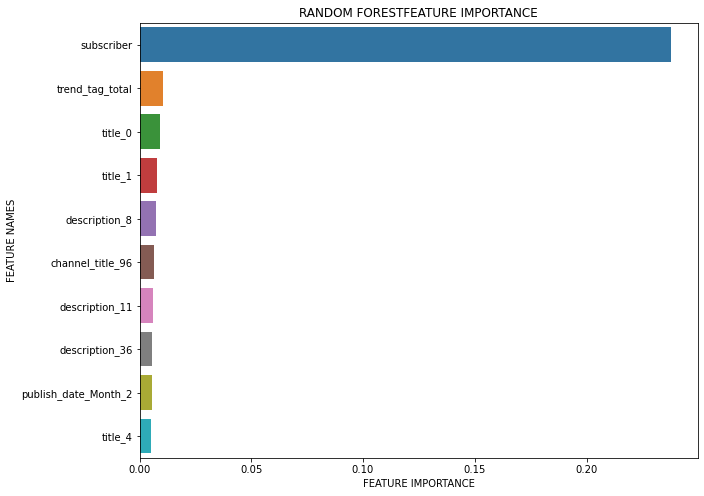

In [111]:
plot_feature_importance(rf_reg.feature_importances_, x_dev.columns,'RANDOM FOREST')

# Another Target: likes_per (Likes Percentage)

In [112]:
target = df_fit['likes_per']
features = df_fit.drop(columns = ["views", "likes_per"])

In [113]:
#Train test Split
X_dev, X_test, y_dev, y_test = train_test_split(features, target, 
                                                test_size = 0.2, 
                                                random_state = 42)

# resetting indices on split data
X_dev.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_dev.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [114]:
#Process the text columns
vectorizer = CountVectorizer(stop_words='english', min_df=4)

x_dev, x_test = text_preprocessing(
    X_dev, X_test, text_cols, 
    vectorizer, use_lsa = True
)

In [115]:
# Define K-fold
cv = KFold(n_splits=5, random_state=42, shuffle=True)


#### Linear Regression 

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler

#lin_PCA = PCA(n_components = 250).fit(x_dev)
#x_dev_PCA = lin_PCA.transform(x_dev)
#x_test_PCA = lin_PCA.transform(x_test)
linearReg = LinearRegression().fit(x_dev, y_dev)
y_pred = linearReg.predict(x_test)
r2_train = linearReg.score(x_dev, y_dev)
r2_test = linearReg.score(x_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
results = mean_squared_error(y_test, y_pred, squared = False)

print("Linear Regression")
print("Train set R^2: ", r2_train)
print("Test set R^2: ", r2_test)
print("Test set MAE: ", mae)
print("Test set RMSE: ", results)

Linear Regression
Train set R^2:  0.40966513658355763
Test set R^2:  0.21450545611464122
Test set MAE:  0.06901228562385736
Test set RMSE:  0.11824055364580663


#### Ridge Regression: Including Hyperparameters Tuning

In [117]:
norm = MinMaxScaler()
x_dev_norm = norm.fit_transform(x_dev)
x_test_norm = norm.transform(x_test)

ridge_reg = Ridge().fit(x_dev_norm, y_dev)
y_pred = ridge_reg.predict(x_test_norm)
r2_train = ridge_reg.score(x_dev_norm, y_dev)
r2_test = ridge_reg.score(x_test_norm, y_test)
mae = mean_absolute_error(y_test, y_pred)
results = mean_squared_error(y_test, y_pred, squared = False)

print("Ridge Regression")
print("Train set R^2: ", r2_train)
print("Test set R^2: ", r2_test)
print("Test set MAE: ", mae)
print("Test set RMSE: ", results)

Ridge Regression
Train set R^2:  0.3974399006143674
Test set R^2:  0.25236323739888533
Test set MAE:  0.06548533890768209
Test set RMSE:  0.11535600105635196


In [118]:
# Without PCA
# 10-FOLD CROSS-VALIDATED ACCURACY AND PRECISION
warnings.filterwarnings("ignore")

model_ridge = Ridge(random_state = 0)

# Creating space for different hyperparameters
space = dict()
space['alpha'] = [a for a in np.arange(0.1, 100, 0.1)]

# Search
search = GridSearchCV(model_ridge, space, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, verbose = 2)
result = search.fit(x_dev_norm, y_dev)

#Print Result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 5 folds for each of 999 candidates, totalling 4995 fits


/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.war

Best Score: -0.10591108161274751
Best Hyperparameters: {'alpha': 8.8}


In [119]:
#Print Result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -0.10591108161274751
Best Hyperparameters: {'alpha': 8.8}


In [120]:
#Best Ridge - likes_per
ridge_reg = Ridge(alpha = 7.7).fit(x_dev_norm, y_dev)
y_pred = ridge_reg.predict(x_test_norm)

r2_train = ridge_reg.score(x_dev_norm, y_dev)
r2_test = ridge_reg.score(x_test_norm, y_test)
mae = mean_absolute_error(y_test, y_pred)
results = mean_squared_error(y_test, y_pred, squared = False)

print("Ridge Regression")
print("Train set R^2: ", r2_train)
print("Test set R^2: ", r2_test)
print("Test set MAE: ", mae)
print("Test set RMSE: ", results)

Ridge Regression
Train set R^2:  0.36198198937073545
Test set R^2:  0.2698025076932806
Test set MAE:  0.06378552757507559
Test set RMSE:  0.11400267365614253


#### Random Forest

In [703]:
rf_reg = RandomForestRegressor(n_estimators = 150, max_depth = 10, criterion = 'absolute_error', n_jobs=-1).fit(x_dev, y_dev)
y_pred = rf_reg.predict(x_test)

r2_train = rf_reg.score(x_dev, y_dev)
r2_test = rf_reg.score(x_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
results = mean_squared_error(y_test, y_pred, squared = False)

print("Random Forest Regression")
print("Train set R^2: ", r2_train)
print("Test set R^2: ", r2_test)
print("Test set MAE: ", mae)
print("Test set RMSE: ", results)

[CV] END ...........................alpha=59.300000000000004; total time=   0.1s
[CV] END ...........................alpha=59.300000000000004; total time=   0.1s
[CV] END .........................................alpha=59.6; total time=   0.1s
[CV] END .........................................alpha=59.6; total time=   0.1s
[CV] END .........................................alpha=60.1; total time=   0.1s
[CV] END .........................................alpha=60.1; total time=   0.1s
[CV] END ............................alpha=60.50000000000001; total time=   0.1s
[CV] END ............................alpha=60.50000000000001; total time=   0.1s
[CV] END ...........................alpha=60.800000000000004; total time=   0.1s
[CV] END ...........................alpha=60.800000000000004; total time=   0.1s
[CV] END .........................................alpha=61.2; total time=   0.1s
[CV] END .........................................alpha=61.2; total time=   0.1s
[CV] END ...................

[CV] END .........................................alpha=81.3; total time=   0.1s
[CV] END .........................................alpha=81.7; total time=   0.1s
[CV] END .........................................alpha=81.7; total time=   0.0s
[CV] END .........................................alpha=82.1; total time=   0.1s
[CV] END .........................................alpha=82.1; total time=   0.1s
[CV] END .........................................alpha=82.5; total time=   0.1s
[CV] END .........................................alpha=82.5; total time=   0.1s
[CV] END .........................................alpha=82.8; total time=   0.1s
[CV] END .........................................alpha=82.8; total time=   0.0s
[CV] END .........................................alpha=83.2; total time=   0.1s
[CV] END .........................................alpha=83.2; total time=   0.1s
[CV] END .........................................alpha=83.5; total time=   0.1s
[CV] END ...................

[CV] END .........................................alpha=61.2; total time=   0.1s
[CV] END .........................................alpha=61.6; total time=   0.1s
[CV] END .........................................alpha=61.6; total time=   0.1s
[CV] END .........................................alpha=62.1; total time=   0.1s
[CV] END .........................................alpha=62.2; total time=   0.1s
[CV] END ...........................alpha=62.400000000000006; total time=   0.1s
[CV] END ...........................alpha=62.400000000000006; total time=   0.1s
[CV] END ...........................alpha=62.800000000000004; total time=   0.1s
[CV] END ...........................alpha=62.800000000000004; total time=   0.1s
[CV] END .........................................alpha=63.1; total time=   0.1s
[CV] END .........................................alpha=63.2; total time=   0.1s
[CV] END .........................................alpha=63.6; total time=   0.1s
[CV] END ...................

[CV] END .........................................alpha=61.1; total time=   0.1s
[CV] END ............................alpha=61.50000000000001; total time=   0.1s
[CV] END ............................alpha=61.50000000000001; total time=   0.1s
[CV] END ...........................alpha=61.800000000000004; total time=   0.1s
[CV] END ...........................alpha=61.800000000000004; total time=   0.1s
[CV] END .........................................alpha=62.6; total time=   0.1s
[CV] END .........................................alpha=62.6; total time=   0.1s
[CV] END .........................................alpha=63.1; total time=   0.1s
[CV] END .........................................alpha=63.1; total time=   0.1s
[CV] END ............................alpha=63.50000000000001; total time=   0.1s
[CV] END ............................alpha=63.50000000000001; total time=   0.1s
[CV] END .........................................alpha=63.7; total time=   0.1s
[CV] END ...................

[CV] END .........................................alpha=93.0; total time=   0.1s
[CV] END .........................................alpha=93.4; total time=   0.1s
[CV] END .........................................alpha=93.4; total time=   0.1s
[CV] END .........................................alpha=93.8; total time=   0.1s
[CV] END .........................................alpha=93.8; total time=   0.1s
[CV] END .........................................alpha=94.2; total time=   0.1s
[CV] END .........................................alpha=94.2; total time=   0.1s
[CV] END .........................................alpha=94.7; total time=   0.1s
[CV] END .........................................alpha=94.7; total time=   0.1s
[CV] END .........................................alpha=95.1; total time=   0.1s
[CV] END .........................................alpha=95.2; total time=   0.1s
[CV] END .........................................alpha=95.5; total time=   0.1s
[CV] END ...................

[CV] END ...........................alpha=62.400000000000006; total time=   0.1s
[CV] END .........................................alpha=62.7; total time=   0.1s
[CV] END ...........................alpha=62.800000000000004; total time=   0.1s
[CV] END ...........................alpha=63.400000000000006; total time=   0.1s
[CV] END ...........................alpha=63.400000000000006; total time=   0.1s
[CV] END ...........................alpha=63.900000000000006; total time=   0.1s
[CV] END ...........................alpha=63.900000000000006; total time=   0.1s
[CV] END .........................................alpha=64.1; total time=   0.1s
[CV] END .........................................alpha=64.1; total time=   0.1s
[CV] END .........................................alpha=64.5; total time=   0.1s
[CV] END .........................................alpha=64.6; total time=   0.1s
[CV] END ............................alpha=64.89999999999999; total time=   0.1s
[CV] END ...................

[CV] END .........................................alpha=62.7; total time=   0.1s
[CV] END .........................................alpha=63.1; total time=   0.1s
[CV] END .........................................alpha=63.1; total time=   0.1s
[CV] END ............................alpha=63.50000000000001; total time=   0.1s
[CV] END ............................alpha=63.50000000000001; total time=   0.0s
[CV] END ...........................alpha=63.900000000000006; total time=   0.1s
[CV] END ...........................alpha=63.900000000000006; total time=   0.1s
[CV] END .........................................alpha=64.3; total time=   0.1s
[CV] END ............................alpha=64.39999999999999; total time=   0.1s
[CV] END .........................................alpha=64.7; total time=   0.1s
[CV] END .........................................alpha=64.8; total time=   0.1s
[CV] END .........................................alpha=65.1; total time=   0.1s
[CV] END ...................

[CV] END ............................alpha=62.50000000000001; total time=   0.1s
[CV] END ............................alpha=62.50000000000001; total time=   0.1s
[CV] END ...........................alpha=62.800000000000004; total time=   0.1s
[CV] END ...........................alpha=62.800000000000004; total time=   0.1s
[CV] END .........................................alpha=63.2; total time=   0.1s
[CV] END .........................................alpha=63.2; total time=   0.1s
[CV] END .........................................alpha=63.6; total time=   0.1s
[CV] END .........................................alpha=63.6; total time=   0.1s
[CV] END .........................................alpha=64.0; total time=   0.1s
[CV] END .........................................alpha=64.0; total time=   0.1s
[CV] END ............................alpha=64.39999999999999; total time=   0.1s
[CV] END ............................alpha=64.39999999999999; total time=   0.1s
[CV] END ...................

[CV] END .........................................alpha=62.2; total time=   0.0s
[CV] END .........................................alpha=62.6; total time=   0.1s
[CV] END .........................................alpha=62.6; total time=   0.1s
[CV] END ...........................alpha=62.900000000000006; total time=   0.1s
[CV] END ...........................alpha=62.900000000000006; total time=   0.1s
[CV] END ...........................alpha=63.300000000000004; total time=   0.1s
[CV] END ...........................alpha=63.300000000000004; total time=   0.1s
[CV] END ...........................alpha=63.800000000000004; total time=   0.1s
[CV] END ...........................alpha=63.800000000000004; total time=   0.1s
[CV] END .........................................alpha=64.2; total time=   0.1s
[CV] END .........................................alpha=64.2; total time=   0.1s
[CV] END .........................................alpha=64.6; total time=   0.1s
[CV] END ...................

[CV] END ...........................alpha=61.300000000000004; total time=   0.1s
[CV] END ...........................alpha=61.300000000000004; total time=   0.1s
[CV] END .........................................alpha=61.7; total time=   0.1s
[CV] END .........................................alpha=61.7; total time=   0.1s
[CV] END ............................alpha=62.00000000000001; total time=   0.1s
[CV] END ............................alpha=62.00000000000001; total time=   0.1s
[CV] END ............................alpha=62.50000000000001; total time=   0.1s
[CV] END .........................................alpha=62.6; total time=   0.1s
[CV] END ............................alpha=63.00000000000001; total time=   0.1s
[CV] END ............................alpha=63.00000000000001; total time=   0.1s
[CV] END ...........................alpha=63.400000000000006; total time=   0.1s
[CV] END ...........................alpha=63.400000000000006; total time=   0.1s
[CV] END ...................

Random Forest Regression
Train set R^2:  0.6320610121405374
Test set R^2:  0.21909242082336566
Test set MAE:  0.056857457532634915
Test set RMSE:  0.11789481008289465


In [ ]:
print("Random Forest Regression")
print("Train set R^2: ", r2_train)
print("Test set R^2: ", r2_test)
print("Test set MAE: ", mae)
print("Test set RMSE: ", results)

#### XGBoost Regressor - Including Hyperparameters Tuning

In [704]:
xg_reg = XGBRegressor().fit(x_dev, y_dev)
y_pred = xg_reg.predict(x_test)
r2_train = xg_reg.score(x_dev, y_dev)
r2_test = xg_reg.score(x_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
results = mean_squared_error(y_test, y_pred, squared = False)

print("XGBoost Regressor")
print("Train set R^2: ", r2_train)
print("Test set R^2: ", r2_test)
print("Test set MAE: ", mae)
print("Test set RMSE: ", results)

XGBoost Regressor
Train set R^2:  0.9968987140548432
Test set R^2:  0.2052170888274749
Test set MAE:  0.06599961159175446
Test set RMSE:  0.11893758843429315


In [707]:
model_xg = XGBRegressor(random_state=0)

# Creating space for different hyperparameters
space = dict()
space['eta'] = [a for a in np.arange(0.1, 1.1, 0.1)]
space['max_depth'] = [4, 5, 6, 7]

# Search
search = GridSearchCV(model_xg, space, scoring= 'neg_root_mean_squared_error', cv=cv, n_jobs=-1, verbose = 2)
result = search.fit(x_dev, y_dev)

#Print Result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.war

/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprec

/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprec

/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprec

/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprec

/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprec

/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprec

/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprec

Best Score: -0.10502242077752307
Best Hyperparameters: {'eta': 0.1, 'max_depth': 4}
[CV] END ...............................eta=0.1, max_depth=5; total time=  31.2s
[CV] END ...............................eta=0.1, max_depth=7; total time= 1.0min
[CV] END ...............................eta=0.2, max_depth=6; total time=  40.2s
[CV] END ...............eta=0.30000000000000004, max_depth=4; total time=  18.7s
[CV] END ...............eta=0.30000000000000004, max_depth=5; total time=  26.3s
[CV] END ...............eta=0.30000000000000004, max_depth=7; total time= 1.0min
[CV] END ...............................eta=0.4, max_depth=6; total time=  38.3s
[CV] END ...............................eta=0.5, max_depth=4; total time=  19.6s
[CV] END ...............................eta=0.5, max_depth=5; total time=  27.5s
[CV] END ...............................eta=0.5, max_depth=7; total time=  40.1s
[CV] END ...............................eta=0.6, max_depth=5; total time=  27.3s
[CV] END ................

[CV] END ...............................eta=0.1, max_depth=5; total time=  31.9s
[CV] END ...............................eta=0.1, max_depth=7; total time=  59.6s
[CV] END ...............................eta=0.2, max_depth=6; total time=  39.2s
[CV] END ...............eta=0.30000000000000004, max_depth=4; total time=  18.7s
[CV] END ...............eta=0.30000000000000004, max_depth=5; total time=  26.1s
[CV] END ...............eta=0.30000000000000004, max_depth=7; total time= 1.0min
[CV] END ...............................eta=0.4, max_depth=6; total time=  38.7s
[CV] END ...............................eta=0.5, max_depth=4; total time=  19.4s
[CV] END ...............................eta=0.5, max_depth=5; total time=  27.9s
[CV] END ...............................eta=0.5, max_depth=7; total time=  41.4s
[CV] END ...............................eta=0.6, max_depth=5; total time=  27.7s
[CV] END ...............................eta=0.6, max_depth=7; total time=  35.2s
[CV] END ................eta

In [708]:
#Print Result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -0.10502242077752307
Best Hyperparameters: {'eta': 0.1, 'max_depth': 4}


In [709]:
xg_reg = XGBRegressor(eta=0.1, max_depth=4).fit(x_dev, y_dev)
y_pred = xg_reg.predict(x_test)
r2_train = xg_reg.score(x_dev, y_dev)
r2_test = xg_reg.score(x_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
results = mean_squared_error(y_test, y_pred, squared = False)

print("XGBoost Regressor")
print("Train set R^2: ", r2_train)
print("Test set R^2: ", r2_test)
print("Test set MAE: ", mae)
print("Test set RMSE: ", results)

XGBoost Regressor
Train set R^2:  0.7590286999841873
Test set R^2:  0.27277580219608155
Test set MAE:  0.061250805639473466
Test set RMSE:  0.11377033289384701


#### CATBoost Regressor: Including Hyperparameters Tuning

In [307]:
#Initial Fit with default hyperparameters
from catboost import CatBoostRegressor
cat_reg = CatBoostRegressor().fit(x_dev, y_dev)
y_pred = cat_reg.predict(x_test)
r2_train = cat_reg.score(x_dev, y_dev)
r2_test = cat_reg.score(x_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
results = mean_squared_error(y_test, y_pred, squared = False)

print("CATBoost Regressor")
print("Train set R^2: ", r2_train)
print("Test set R^2: ", r2_test)
print("Test set MAE: ", mae)
print("Test set RMSE: ", results)

Learning rate set to 0.050127
0:	learn: 0.1221448	total: 10.8ms	remaining: 10.8s
1:	learn: 0.1210698	total: 16.3ms	remaining: 8.11s
2:	learn: 0.1199922	total: 21.2ms	remaining: 7.04s
3:	learn: 0.1189844	total: 25.8ms	remaining: 6.42s
4:	learn: 0.1181539	total: 29.6ms	remaining: 5.88s
5:	learn: 0.1173790	total: 34.2ms	remaining: 5.66s
6:	learn: 0.1167151	total: 41.4ms	remaining: 5.88s
7:	learn: 0.1159941	total: 45.9ms	remaining: 5.69s
8:	learn: 0.1152755	total: 50.1ms	remaining: 5.52s
9:	learn: 0.1146685	total: 54.1ms	remaining: 5.36s
10:	learn: 0.1140818	total: 58.2ms	remaining: 5.23s
11:	learn: 0.1135239	total: 62.2ms	remaining: 5.12s
12:	learn: 0.1129767	total: 66.4ms	remaining: 5.04s
13:	learn: 0.1124388	total: 70.5ms	remaining: 4.96s
14:	learn: 0.1120493	total: 74.6ms	remaining: 4.9s
15:	learn: 0.1116575	total: 78.8ms	remaining: 4.84s
16:	learn: 0.1112327	total: 82.9ms	remaining: 4.79s
17:	learn: 0.1108995	total: 87.2ms	remaining: 4.76s
18:	learn: 0.1105603	total: 91.2ms	remaining:

175:	learn: 0.0928045	total: 779ms	remaining: 3.65s
176:	learn: 0.0927358	total: 787ms	remaining: 3.66s
177:	learn: 0.0926685	total: 791ms	remaining: 3.65s
178:	learn: 0.0926319	total: 796ms	remaining: 3.65s
179:	learn: 0.0925208	total: 801ms	remaining: 3.65s
180:	learn: 0.0924885	total: 805ms	remaining: 3.64s
181:	learn: 0.0924506	total: 809ms	remaining: 3.63s
182:	learn: 0.0923622	total: 813ms	remaining: 3.63s
183:	learn: 0.0922749	total: 817ms	remaining: 3.62s
184:	learn: 0.0922212	total: 821ms	remaining: 3.62s
185:	learn: 0.0921528	total: 826ms	remaining: 3.61s
186:	learn: 0.0921090	total: 831ms	remaining: 3.61s
187:	learn: 0.0920128	total: 835ms	remaining: 3.61s
188:	learn: 0.0919234	total: 840ms	remaining: 3.6s
189:	learn: 0.0917973	total: 845ms	remaining: 3.6s
190:	learn: 0.0916776	total: 849ms	remaining: 3.6s
191:	learn: 0.0916174	total: 855ms	remaining: 3.6s
192:	learn: 0.0915111	total: 859ms	remaining: 3.59s
193:	learn: 0.0914053	total: 864ms	remaining: 3.59s
194:	learn: 0.09

347:	learn: 0.0812659	total: 1.73s	remaining: 3.25s
348:	learn: 0.0811899	total: 1.74s	remaining: 3.24s
349:	learn: 0.0811065	total: 1.74s	remaining: 3.24s
350:	learn: 0.0810329	total: 1.75s	remaining: 3.23s
351:	learn: 0.0809450	total: 1.75s	remaining: 3.22s
352:	learn: 0.0808847	total: 1.75s	remaining: 3.22s
353:	learn: 0.0808191	total: 1.76s	remaining: 3.21s
354:	learn: 0.0807516	total: 1.76s	remaining: 3.21s
355:	learn: 0.0807120	total: 1.77s	remaining: 3.2s
356:	learn: 0.0806548	total: 1.77s	remaining: 3.19s
357:	learn: 0.0805963	total: 1.78s	remaining: 3.2s
358:	learn: 0.0805756	total: 1.79s	remaining: 3.19s
359:	learn: 0.0805001	total: 1.79s	remaining: 3.19s
360:	learn: 0.0804378	total: 1.8s	remaining: 3.18s
361:	learn: 0.0803919	total: 1.8s	remaining: 3.18s
362:	learn: 0.0803270	total: 1.81s	remaining: 3.17s
363:	learn: 0.0803019	total: 1.81s	remaining: 3.16s
364:	learn: 0.0802369	total: 1.81s	remaining: 3.16s
365:	learn: 0.0801702	total: 1.82s	remaining: 3.15s
366:	learn: 0.08

511:	learn: 0.0723965	total: 2.52s	remaining: 2.4s
512:	learn: 0.0723427	total: 2.52s	remaining: 2.4s
513:	learn: 0.0722902	total: 2.53s	remaining: 2.39s
514:	learn: 0.0722543	total: 2.54s	remaining: 2.39s
515:	learn: 0.0722147	total: 2.54s	remaining: 2.38s
516:	learn: 0.0721575	total: 2.54s	remaining: 2.38s
517:	learn: 0.0721087	total: 2.55s	remaining: 2.37s
518:	learn: 0.0720737	total: 2.55s	remaining: 2.37s
519:	learn: 0.0720150	total: 2.56s	remaining: 2.36s
520:	learn: 0.0719663	total: 2.56s	remaining: 2.35s
521:	learn: 0.0718887	total: 2.56s	remaining: 2.35s
522:	learn: 0.0718345	total: 2.57s	remaining: 2.34s
523:	learn: 0.0717853	total: 2.57s	remaining: 2.34s
524:	learn: 0.0717534	total: 2.58s	remaining: 2.33s
525:	learn: 0.0716917	total: 2.58s	remaining: 2.33s
526:	learn: 0.0716415	total: 2.59s	remaining: 2.32s
527:	learn: 0.0716051	total: 2.59s	remaining: 2.31s
528:	learn: 0.0715900	total: 2.59s	remaining: 2.31s
529:	learn: 0.0715363	total: 2.6s	remaining: 2.3s
530:	learn: 0.07

674:	learn: 0.0657258	total: 3.3s	remaining: 1.59s
675:	learn: 0.0656662	total: 3.31s	remaining: 1.58s
676:	learn: 0.0656012	total: 3.31s	remaining: 1.58s
677:	learn: 0.0655384	total: 3.32s	remaining: 1.57s
678:	learn: 0.0655233	total: 3.32s	remaining: 1.57s
679:	learn: 0.0654768	total: 3.33s	remaining: 1.56s
680:	learn: 0.0654300	total: 3.33s	remaining: 1.56s
681:	learn: 0.0653917	total: 3.33s	remaining: 1.55s
682:	learn: 0.0653572	total: 3.34s	remaining: 1.55s
683:	learn: 0.0653208	total: 3.34s	remaining: 1.54s
684:	learn: 0.0652982	total: 3.35s	remaining: 1.54s
685:	learn: 0.0652267	total: 3.35s	remaining: 1.53s
686:	learn: 0.0651889	total: 3.35s	remaining: 1.53s
687:	learn: 0.0651348	total: 3.36s	remaining: 1.52s
688:	learn: 0.0650901	total: 3.37s	remaining: 1.52s
689:	learn: 0.0650566	total: 3.37s	remaining: 1.51s
690:	learn: 0.0650104	total: 3.37s	remaining: 1.51s
691:	learn: 0.0649329	total: 3.38s	remaining: 1.5s
692:	learn: 0.0648857	total: 3.38s	remaining: 1.5s
693:	learn: 0.0

867:	learn: 0.0584394	total: 4.26s	remaining: 648ms
868:	learn: 0.0584312	total: 4.27s	remaining: 643ms
869:	learn: 0.0584030	total: 4.27s	remaining: 638ms
870:	learn: 0.0583670	total: 4.28s	remaining: 633ms
871:	learn: 0.0583258	total: 4.28s	remaining: 628ms
872:	learn: 0.0582861	total: 4.29s	remaining: 623ms
873:	learn: 0.0582613	total: 4.29s	remaining: 618ms
874:	learn: 0.0582378	total: 4.29s	remaining: 613ms
875:	learn: 0.0581791	total: 4.3s	remaining: 608ms
876:	learn: 0.0581274	total: 4.3s	remaining: 603ms
877:	learn: 0.0580908	total: 4.31s	remaining: 598ms
878:	learn: 0.0580604	total: 4.31s	remaining: 593ms
879:	learn: 0.0580287	total: 4.32s	remaining: 588ms
880:	learn: 0.0580217	total: 4.32s	remaining: 583ms
881:	learn: 0.0579811	total: 4.32s	remaining: 579ms
882:	learn: 0.0579445	total: 4.33s	remaining: 574ms
883:	learn: 0.0579018	total: 4.33s	remaining: 569ms
884:	learn: 0.0578781	total: 4.34s	remaining: 564ms
885:	learn: 0.0578609	total: 4.34s	remaining: 559ms
886:	learn: 0.

In [308]:
#Initial Fit Result
print("CATBoost Regressor")
print("Train set R^2: ", r2_train)
print("Test set R^2: ", r2_test)
print("Test set MAE: ", mae)
print("Test set RMSE: ", results)

CATBoost Regressor
Train set R^2:  0.8066792292410491
Test set R^2:  0.23767308216880734
Test set MAE:  0.06380458404823165
Test set RMSE:  0.11648379080640404


In [194]:
# Hyperparamaters Tuning - Without PCA
# 5-FOLD CROSS-VALIDATED ACCURACY AND PRECISION
warnings.filterwarnings("ignore")

model_cat = CatBoostRegressor(random_state = 0)

# Creating space for different hyperparameters
space = dict()
space['depth'] = [6, 8, 10]
space['learning_rate'] = [0.01, 0.05, 0.1]
space['iterations'] = [30, 50, 100]

# Search
search = GridSearchCV(model_cat, space, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, verbose = 2)
result = search.fit(x_dev, y_dev)

#Print Result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/hshen/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.war

0:	learn: 0.1210710	total: 36.4ms	remaining: 3.61s
1:	learn: 0.1192245	total: 48.8ms	remaining: 2.39s
2:	learn: 0.1172763	total: 65.3ms	remaining: 2.11s
3:	learn: 0.1157382	total: 91.1ms	remaining: 2.19s
4:	learn: 0.1143051	total: 99.2ms	remaining: 1.88s
5:	learn: 0.1129730	total: 119ms	remaining: 1.86s
6:	learn: 0.1118501	total: 131ms	remaining: 1.73s
7:	learn: 0.1108239	total: 139ms	remaining: 1.59s
8:	learn: 0.1097008	total: 148ms	remaining: 1.5s
9:	learn: 0.1088378	total: 157ms	remaining: 1.41s
10:	learn: 0.1081266	total: 165ms	remaining: 1.33s
11:	learn: 0.1071635	total: 174ms	remaining: 1.27s
12:	learn: 0.1064141	total: 184ms	remaining: 1.23s
13:	learn: 0.1058729	total: 192ms	remaining: 1.18s
14:	learn: 0.1052600	total: 201ms	remaining: 1.14s
15:	learn: 0.1044600	total: 209ms	remaining: 1.09s
16:	learn: 0.1038176	total: 218ms	remaining: 1.06s
17:	learn: 0.1035535	total: 225ms	remaining: 1.03s
18:	learn: 0.1029613	total: 233ms	remaining: 994ms
19:	learn: 0.1025125	total: 244ms	rem

In [196]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -0.10785995159211118
Best Hyperparameters: {'depth': 8, 'iterations': 100, 'learning_rate': 0.1}


In [309]:
#Refit after tuning
cat_reg = CatBoostRegressor(iterations=100, learning_rate = 0.1, depth = 8).fit(x_dev, y_dev)
y_pred = cat_reg.predict(x_test)
r2_train = cat_reg.score(x_dev, y_dev)
r2_test = cat_reg.score(x_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
results = mean_squared_error(y_test, y_pred, squared = False)

print("CATBoost Regressor")
print("Train set R^2: ", r2_train)
print("Test set R^2: ", r2_test)
print("Test set MAE: ", mae)
print("Test set RMSE: ", results)

0:	learn: 0.1210710	total: 38ms	remaining: 3.76s
1:	learn: 0.1192245	total: 52.7ms	remaining: 2.58s
2:	learn: 0.1172763	total: 62.6ms	remaining: 2.02s
3:	learn: 0.1157382	total: 73.2ms	remaining: 1.76s
4:	learn: 0.1143051	total: 82.8ms	remaining: 1.57s
5:	learn: 0.1129730	total: 92.8ms	remaining: 1.45s
6:	learn: 0.1118501	total: 102ms	remaining: 1.36s
7:	learn: 0.1108239	total: 112ms	remaining: 1.29s
8:	learn: 0.1097008	total: 121ms	remaining: 1.23s
9:	learn: 0.1088378	total: 131ms	remaining: 1.18s
10:	learn: 0.1081266	total: 140ms	remaining: 1.14s
11:	learn: 0.1071635	total: 150ms	remaining: 1.1s
12:	learn: 0.1064141	total: 160ms	remaining: 1.07s
13:	learn: 0.1058729	total: 170ms	remaining: 1.04s
14:	learn: 0.1052600	total: 179ms	remaining: 1.02s
15:	learn: 0.1044600	total: 189ms	remaining: 994ms
16:	learn: 0.1038176	total: 199ms	remaining: 971ms
17:	learn: 0.1035535	total: 209ms	remaining: 951ms
18:	learn: 0.1029613	total: 219ms	remaining: 934ms
19:	learn: 0.1025125	total: 229ms	rema

In [310]:
#Best CATBoost Fitting Result
print("CATBoost Regressor")
print("Train set R^2: ", r2_train)
print("Test set R^2: ", r2_test)
print("Test set MAE: ", mae)
print("Test set RMSE: ", results)

CATBoost Regressor
Train set R^2:  0.5235872047536174
Test set R^2:  0.2449731342784225
Test set MAE:  0.06370432309011384
Test set RMSE:  0.11592472405969717


### Feature Importance: Target - Likes Percentage

In [705]:
def plot_feature_importance(importance, names, model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'][:10], y=fi_df['feature_names'][:10])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

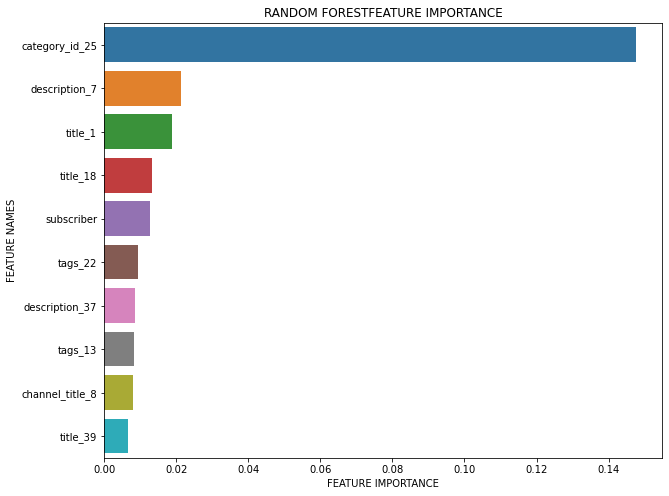

In [706]:
plot_feature_importance(rf_reg.feature_importances_, x_dev.columns,'RANDOM FOREST')

## Another Approach We tried: Classification (Not Working)

In [57]:
y_dev_c = pd.DataFrame(y_dev)
y_test_c = pd.DataFrame(y_test)

In [58]:
# Define each tier
q1 = y_dev_c["views"].quantile(0.2)
q2 = y_dev_c["views"].quantile(0.4)
q3 = y_dev_c["views"].quantile(0.6)
q4 = y_dev_c["views"].quantile(0.8)


In [59]:
#CREATE Labels
conditions_dev = [
    (y_dev_c['views'] <= q1),
    (y_dev_c['views'] > q1) & (y_dev_c['views'] <= q2),
    (y_dev_c['views'] > q2) & (y_dev_c['views'] <= q3),
    (y_dev_c['views'] > q3) & (y_dev_c['views'] <= q4),
    (y_dev_c['views'] > q4)
    ]

conditions_test = [
    (y_test_c['views'] <= q1),
    (y_test_c['views'] > q1) & (y_test_c['views'] <= q2),
    (y_test_c['views'] > q2) & (y_test_c['views'] <= q3),
    (y_test_c['views'] > q3) & (y_test_c['views'] <= q4),
    (y_test_c['views'] > q4)
    ]

# create a list of the values we want to assign for each condition
values = ['tier_5', 'tier_4', 'tier_3', 'tier_2', 'tier_1']

# create a new column and use np.select to assign values to it using our lists as arguments
y_dev['views_label'] = np.select(conditions_dev, values)
y_test['views_label'] = np.select(conditions_test, values)


In [ ]:
target = np.log(df_fit['views'])
features = df_fit.drop(columns = ["views", "likes_per"])

X_dev, X_test, y_dev, y_test = train_test_split(features, target, 
                                                test_size = 0.2, 
                                                random_state = 42)

# resetting indices on split data
X_dev.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_dev.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
vectorizer = CountVectorizer(stop_words='english', min_df=4)

x_dev, x_test = text_preprocessing(
    X_dev, X_test, text_cols, 
    vectorizer, use_lsa = True
)

#### Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier


rf_class = RandomForestClassifier()
rf_class.fit(x_dev, y_dev['views_label'])
acc = rf_class.score(x_test, y_test['views_label'])

print(acc)

0.43867403314917125


In [ ]:
# Without PCA
# 10-FOLD CROSS-VALIDATED ACCURACY AND PRECISION
warnings.filterwarnings("ignore")

steps = [('pca', PCA()), ('rf', ens.RandomForestClassifier(random_state=123))]
model_rf = Pipeline(steps = steps)

# Creating space for different hyperparameters
space = dict()
space['pca__n_components'] = [i for i in range(2, 31)]
space['rf__n_estimators'] = [50, 100, 150, 200, 300, 400, 500]
space['rf__max_depth'] = [None, 5, 10, 14, 19, 25, 30]
space['rf__criterion'] = ['gini', 'entropy']

# Search
search = GridSearchCV(model_rf, space, scoring='accuracy', cv=cv, n_jobs=-1, verbose = 2)
result = search.fit(x_dev, y_dev['views_label'])

#Print Result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

In [ ]:
#Print Result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

#### AdaBoost

In [62]:
from sklearn.ensemble import AdaBoostClassifier

ada_class = AdaBoostClassifier(n_estimators = 500)
ada_class.fit(x_dev_PCA, y_dev['views_label'])
acc = ada_class.score(x_test_PCA, y_test['views_label'])

print(acc)


0.343646408839779


In [63]:
from xgboost import XGBClassifier

warnings.filterwarnings("ignore")

xg_class = XGBClassifier()
xg_class.fit(x_dev, y_dev['views_label'])
acc = xg_class.score(x_test, y_test['views_label'])

print(acc)


[02:10:51] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.40552486187845305


In [64]:
from catboost import CatBoostClassifier

cat_class = CatBoostClassifier()
cat_class.fit(x_dev, y_dev['views_label'])
acc = cat_class.score(x_test, y_test['views_label'])

print(acc)


Learning rate set to 0.084492
0:	learn: 1.5892650	total: 99.1ms	remaining: 1m 38s
1:	learn: 1.5696087	total: 114ms	remaining: 56.9s
2:	learn: 1.5541646	total: 129ms	remaining: 42.8s
3:	learn: 1.5434358	total: 144ms	remaining: 35.8s
4:	learn: 1.5288806	total: 160ms	remaining: 31.8s
5:	learn: 1.5156723	total: 181ms	remaining: 30.1s
6:	learn: 1.5043414	total: 197ms	remaining: 28s
7:	learn: 1.4939838	total: 220ms	remaining: 27.3s
8:	learn: 1.4856710	total: 238ms	remaining: 26.2s
9:	learn: 1.4772328	total: 256ms	remaining: 25.3s
10:	learn: 1.4698435	total: 272ms	remaining: 24.5s
11:	learn: 1.4650389	total: 289ms	remaining: 23.8s
12:	learn: 1.4592662	total: 306ms	remaining: 23.2s
13:	learn: 1.4531118	total: 323ms	remaining: 22.7s
14:	learn: 1.4475058	total: 340ms	remaining: 22.3s
15:	learn: 1.4399827	total: 360ms	remaining: 22.1s
16:	learn: 1.4337668	total: 379ms	remaining: 21.9s
17:	learn: 1.4292783	total: 399ms	remaining: 21.7s
18:	learn: 1.4255524	total: 418ms	remaining: 21.6s
19:	learn: 

160:	learn: 1.1483865	total: 3.62s	remaining: 18.9s
161:	learn: 1.1466966	total: 3.64s	remaining: 18.8s
162:	learn: 1.1448600	total: 3.66s	remaining: 18.8s
163:	learn: 1.1430593	total: 3.68s	remaining: 18.8s
164:	learn: 1.1421276	total: 3.7s	remaining: 18.7s
165:	learn: 1.1412780	total: 3.72s	remaining: 18.7s
166:	learn: 1.1397412	total: 3.74s	remaining: 18.6s
167:	learn: 1.1385163	total: 3.76s	remaining: 18.6s
168:	learn: 1.1374322	total: 3.77s	remaining: 18.6s
169:	learn: 1.1359757	total: 3.79s	remaining: 18.5s
170:	learn: 1.1347255	total: 3.81s	remaining: 18.5s
171:	learn: 1.1334616	total: 3.83s	remaining: 18.4s
172:	learn: 1.1323811	total: 3.85s	remaining: 18.4s
173:	learn: 1.1308649	total: 3.87s	remaining: 18.4s
174:	learn: 1.1299696	total: 3.89s	remaining: 18.3s
175:	learn: 1.1292054	total: 3.92s	remaining: 18.3s
176:	learn: 1.1285117	total: 3.94s	remaining: 18.3s
177:	learn: 1.1269434	total: 3.96s	remaining: 18.3s
178:	learn: 1.1254732	total: 3.98s	remaining: 18.3s
179:	learn: 1

329:	learn: 0.9526426	total: 6.75s	remaining: 13.7s
330:	learn: 0.9519378	total: 6.76s	remaining: 13.7s
331:	learn: 0.9511950	total: 6.78s	remaining: 13.6s
332:	learn: 0.9502300	total: 6.8s	remaining: 13.6s
333:	learn: 0.9497151	total: 6.81s	remaining: 13.6s
334:	learn: 0.9485977	total: 6.83s	remaining: 13.6s
335:	learn: 0.9476442	total: 6.85s	remaining: 13.5s
336:	learn: 0.9461715	total: 6.87s	remaining: 13.5s
337:	learn: 0.9451107	total: 6.88s	remaining: 13.5s
338:	learn: 0.9444538	total: 6.9s	remaining: 13.5s
339:	learn: 0.9437370	total: 6.92s	remaining: 13.4s
340:	learn: 0.9424248	total: 6.94s	remaining: 13.4s
341:	learn: 0.9416124	total: 6.95s	remaining: 13.4s
342:	learn: 0.9404675	total: 6.97s	remaining: 13.4s
343:	learn: 0.9393145	total: 6.99s	remaining: 13.3s
344:	learn: 0.9383846	total: 7s	remaining: 13.3s
345:	learn: 0.9377089	total: 7.03s	remaining: 13.3s
346:	learn: 0.9368912	total: 7.04s	remaining: 13.3s
347:	learn: 0.9363073	total: 7.06s	remaining: 13.2s
348:	learn: 0.935

496:	learn: 0.8236800	total: 9.41s	remaining: 9.52s
497:	learn: 0.8230605	total: 9.42s	remaining: 9.5s
498:	learn: 0.8223475	total: 9.45s	remaining: 9.49s
499:	learn: 0.8215777	total: 9.47s	remaining: 9.47s
500:	learn: 0.8207265	total: 9.48s	remaining: 9.44s
501:	learn: 0.8191965	total: 9.5s	remaining: 9.42s
502:	learn: 0.8181764	total: 9.51s	remaining: 9.4s
503:	learn: 0.8171618	total: 9.53s	remaining: 9.38s
504:	learn: 0.8167254	total: 9.54s	remaining: 9.35s
505:	learn: 0.8159100	total: 9.55s	remaining: 9.33s
506:	learn: 0.8151029	total: 9.57s	remaining: 9.3s
507:	learn: 0.8143521	total: 9.58s	remaining: 9.28s
508:	learn: 0.8136848	total: 9.6s	remaining: 9.26s
509:	learn: 0.8130789	total: 9.61s	remaining: 9.24s
510:	learn: 0.8125319	total: 9.63s	remaining: 9.21s
511:	learn: 0.8115892	total: 9.64s	remaining: 9.19s
512:	learn: 0.8109001	total: 9.66s	remaining: 9.17s
513:	learn: 0.8105805	total: 9.67s	remaining: 9.15s
514:	learn: 0.8098143	total: 9.69s	remaining: 9.12s
515:	learn: 0.809

663:	learn: 0.7153957	total: 12.1s	remaining: 6.11s
664:	learn: 0.7146443	total: 12.1s	remaining: 6.09s
665:	learn: 0.7141457	total: 12.1s	remaining: 6.07s
666:	learn: 0.7136248	total: 12.1s	remaining: 6.05s
667:	learn: 0.7134297	total: 12.1s	remaining: 6.03s
668:	learn: 0.7126061	total: 12.1s	remaining: 6.01s
669:	learn: 0.7121938	total: 12.2s	remaining: 5.99s
670:	learn: 0.7117767	total: 12.2s	remaining: 5.97s
671:	learn: 0.7112722	total: 12.2s	remaining: 5.95s
672:	learn: 0.7107968	total: 12.2s	remaining: 5.93s
673:	learn: 0.7105351	total: 12.2s	remaining: 5.91s
674:	learn: 0.7091273	total: 12.2s	remaining: 5.89s
675:	learn: 0.7085559	total: 12.3s	remaining: 5.87s
676:	learn: 0.7081747	total: 12.3s	remaining: 5.85s
677:	learn: 0.7073051	total: 12.3s	remaining: 5.83s
678:	learn: 0.7069515	total: 12.3s	remaining: 5.81s
679:	learn: 0.7061903	total: 12.3s	remaining: 5.8s
680:	learn: 0.7059720	total: 12.3s	remaining: 5.78s
681:	learn: 0.7052499	total: 12.3s	remaining: 5.76s
682:	learn: 0

822:	learn: 0.6409546	total: 14.7s	remaining: 3.17s
823:	learn: 0.6405490	total: 14.7s	remaining: 3.15s
824:	learn: 0.6398977	total: 14.8s	remaining: 3.13s
825:	learn: 0.6395905	total: 14.8s	remaining: 3.11s
826:	learn: 0.6389897	total: 14.8s	remaining: 3.09s
827:	learn: 0.6386998	total: 14.8s	remaining: 3.07s
828:	learn: 0.6379897	total: 14.8s	remaining: 3.06s
829:	learn: 0.6375437	total: 14.8s	remaining: 3.04s
830:	learn: 0.6370982	total: 14.8s	remaining: 3.02s
831:	learn: 0.6367064	total: 14.9s	remaining: 3s
832:	learn: 0.6363940	total: 14.9s	remaining: 2.98s
833:	learn: 0.6359928	total: 14.9s	remaining: 2.96s
834:	learn: 0.6354535	total: 14.9s	remaining: 2.94s
835:	learn: 0.6351378	total: 14.9s	remaining: 2.93s
836:	learn: 0.6345500	total: 14.9s	remaining: 2.91s
837:	learn: 0.6340615	total: 15s	remaining: 2.89s
838:	learn: 0.6335318	total: 15s	remaining: 2.87s
839:	learn: 0.6330436	total: 15s	remaining: 2.85s
840:	learn: 0.6323434	total: 15s	remaining: 2.84s
841:	learn: 0.6319821	t

984:	learn: 0.5738146	total: 17.4s	remaining: 265ms
985:	learn: 0.5735192	total: 17.4s	remaining: 248ms
986:	learn: 0.5732673	total: 17.5s	remaining: 230ms
987:	learn: 0.5728937	total: 17.5s	remaining: 212ms
988:	learn: 0.5726156	total: 17.5s	remaining: 195ms
989:	learn: 0.5723500	total: 17.5s	remaining: 177ms
990:	learn: 0.5717999	total: 17.5s	remaining: 159ms
991:	learn: 0.5716128	total: 17.5s	remaining: 142ms
992:	learn: 0.5710040	total: 17.6s	remaining: 124ms
993:	learn: 0.5707950	total: 17.6s	remaining: 106ms
994:	learn: 0.5702891	total: 17.6s	remaining: 88.4ms
995:	learn: 0.5698758	total: 17.6s	remaining: 70.7ms
996:	learn: 0.5696070	total: 17.6s	remaining: 53ms
997:	learn: 0.5691196	total: 17.6s	remaining: 35.4ms
998:	learn: 0.5686196	total: 17.7s	remaining: 17.7ms
999:	learn: 0.5683476	total: 17.7s	remaining: 0us
0.41104972375690607


In [134]:
from sklearn.ensemble import GradientBoostingClassifier

grad_class = GradientBoostingClassifier()
grad_class.fit(x_dev, y_dev['views_label'])
acc = grad_class.score(x_test, y_test['views_label'])

print(acc)


0.4107773851590106
